In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.measure import label, regionprops
from skimage.morphology import remove_small_objects

# Folder paths
image_folder = "C:/Users/USER/Desktop/test/images/"  
mask_folder = "C:/Users/USER/Desktop/test/masks/"

In [6]:
def region_growing(image, seed_point, threshold=10):
    h, w = image.shape[:2]
    segmented = np.zeros((h, w), np.uint8)
    seed_x, seed_y = seed_point
    seed_value = image[seed_y, seed_x]

    # Stack to store growing pixels
    stack = [(seed_x, seed_y)]
    while stack:
        x, y = stack.pop()
        if segmented[y, x] == 0:  # If not already visited
            if abs(int(image[y, x]) - int(seed_value)) < threshold:
                segmented[y, x] = 255  # Mark as part of region
                # Add neighbors to stack
                for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                    if 0 <= x + dx < w and 0 <= y + dy < h:
                        stack.append((x + dx, y + dy))
    return segmented


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters for region growing
THRESHOLD = 15  # Intensity similarity threshold
SEED_POINT = (50, 50)  # Default seed point (change as needed)

def region_growing(image, seed, threshold=THRESHOLD):
    """
    Perform region growing based on intensity similarity.
    """
    height, width = image.shape
    segmented = np.zeros_like(image)  # Output segmented image
    visited = np.zeros_like(image, dtype=bool)  # Track visited pixels
    region_pixels = []  # List to store region pixels

    # Get the seed intensity
    seed_intensity = image[seed[1], seed[0]]
    
    # Initialize queue with seed point
    queue = [seed]

    while queue:
        x, y = queue.pop(0)

        if visited[y, x]:  # Skip if already visited
            continue

        visited[y, x] = True  # Mark as visited



In [12]:
def region_growing(image, seed, threshold=THRESHOLD):
    """
    Perform region growing based on intensity similarity.
    """
    height, width = image.shape
    segmented = np.zeros_like(image)  # Output segmented image
    visited = np.zeros_like(image, dtype=bool)  # Track visited pixels
    region_pixels = []  # List to store region pixels

    # Get the seed intensity
    seed_intensity = image[seed[1], seed[0]]
    
    # Initialize queue with seed point
    queue = [seed]

    while queue:
        x, y = queue.pop(0)

        if visited[y, x]:  # Skip if already visited
            continue

        visited[y, x] = True  # Mark as visited
   
        # Check intensity difference
        if abs(int(image[y, x]) - int(seed_intensity)) < threshold:
            segmented[y, x] = 255  # Mark as foreground
            region_pixels.append((x, y))

            # Add 8-neighborhood pixels
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1), (-1, 1), (1, -1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < width and 0 <= ny < height and not visited[ny, nx]:
                    queue.append((nx, ny))

    return segmented

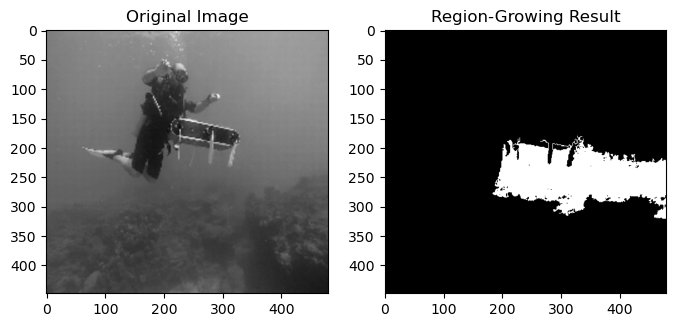

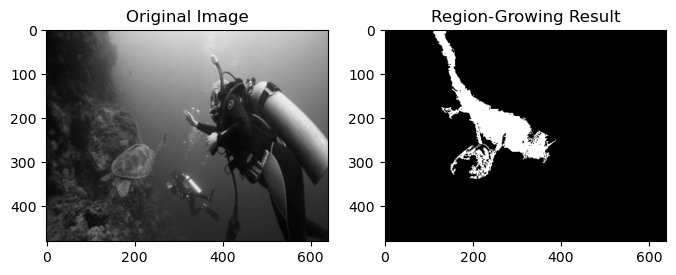

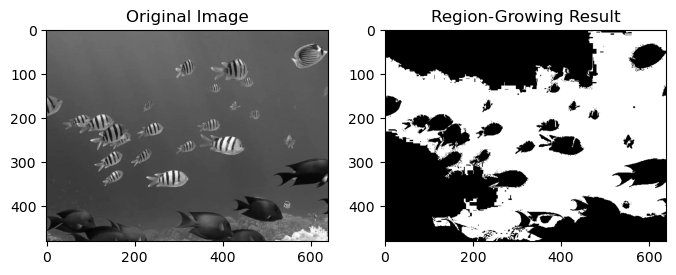

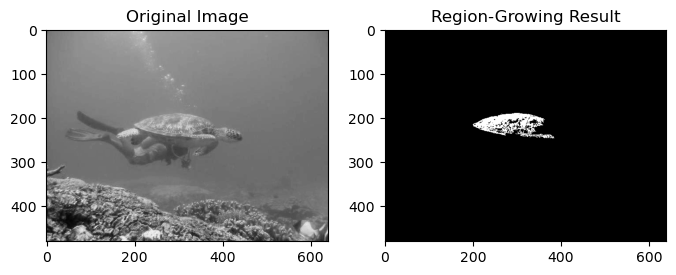

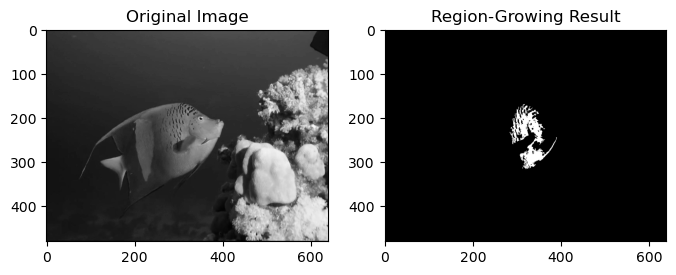

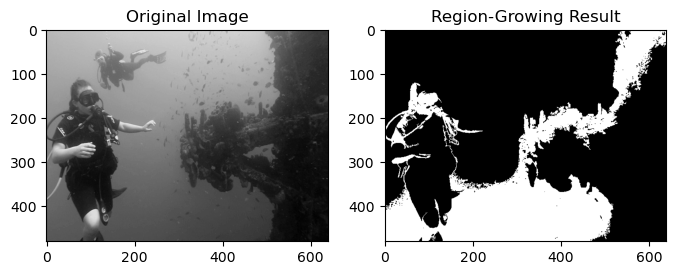

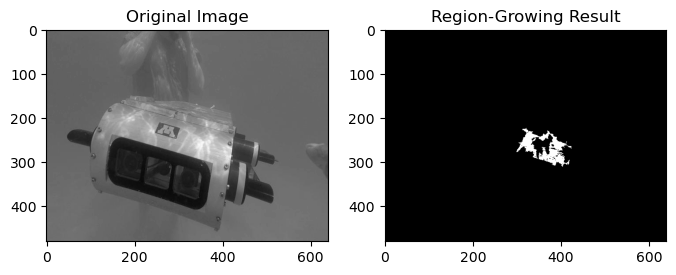

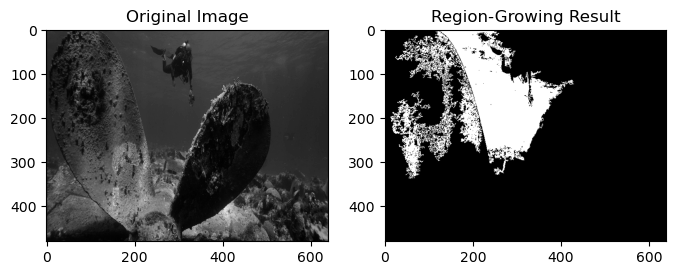

In [13]:


# Load images
image_folder = "C:/Users/USER/Desktop/test/images/"  # Change this to your actual path
output_folder = "C:/Users/USER/Desktop/test/masks/"
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(image_folder):
    img_path = os.path.join(image_folder, filename)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale

    # Apply Region Growing
    seed = (image.shape[1] // 2, image.shape[0] // 2)  # Choose center pixel as seed
    segmented_result = region_growing(image, seed)

    # Save segmented mask
    mask_output_path = os.path.join(output_folder, f"region_{filename}")
    cv2.imwrite(mask_output_path, segmented_result)

    # Display results
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title("Original Image")
    
    ax[1].imshow(segmented_result, cmap='gray')
    ax[1].set_title("Region-Growing Result")

    plt.show()

In [16]:
# Parameters
AREA_THRESHOLD = 500 

def remove_small_regions(binary_image, min_size=AREA_THRESHOLD):
    """
    Removes small noisy regions using Connected Component Analysis (CCA).
    """
    # Apply Connected Component Analysis
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
    
    # Create an output mask initialized to zero (black)
    cleaned_mask = np.zeros_like(binary_image)

    # Keep only components larger than the min_size
    for i in range(1, num_labels):  # Start from 1 to ignore the background (label 0)
        if stats[i, cv2.CC_STAT_AREA] >= min_size:
            cleaned_mask[labels == i] = 255  # Retain large components

    return cleaned_mask

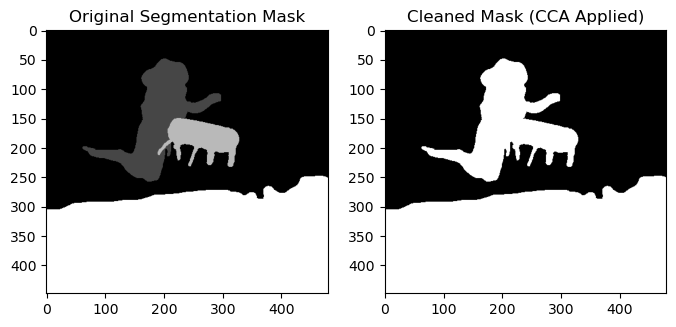

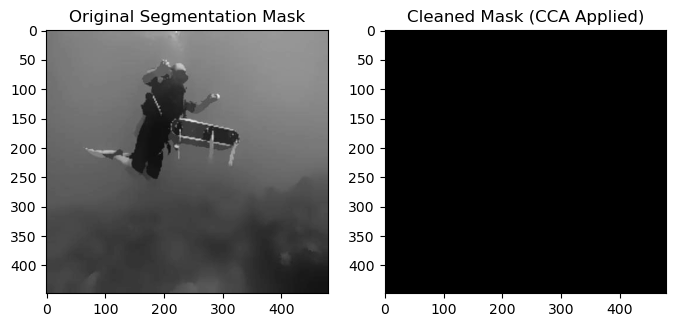

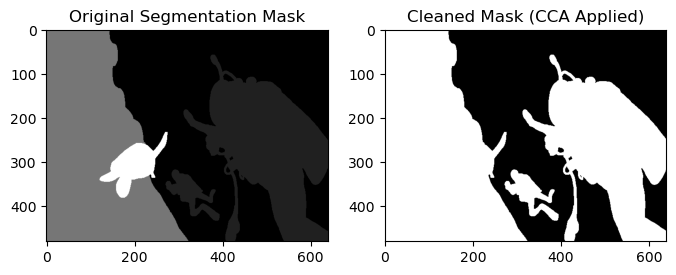

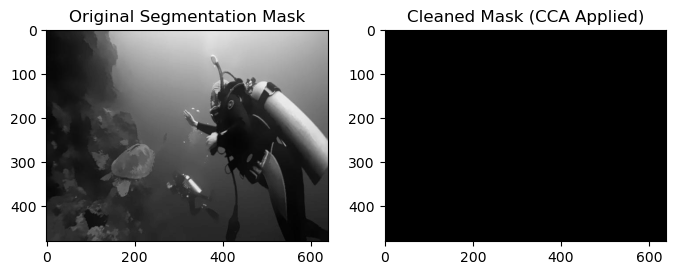

error: Unknown C++ exception from OpenCV code

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
AREA_THRESHOLD = 500  # Minimum region size to keep

def remove_small_regions(binary_image, min_size=AREA_THRESHOLD):
    """
    Removes small noisy regions using Connected Component Analysis (CCA).
    """
    # Apply Connected Component Analysis
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
    
    # Create an output mask initialized to zero (black)
    cleaned_mask = np.zeros_like(binary_image)

    # Keep only components larger than the min_size
    for i in range(1, num_labels):  # Start from 1 to ignore the background (label 0)
        if stats[i, cv2.CC_STAT_AREA] >= min_size:
            cleaned_mask[labels == i] = 255  # Retain large components

    return cleaned_mask

# Folder paths
image_folder = "C:/Users/USER/Desktop/test/images/"
mask_folder = "C:/Users/USER/Desktop/test/masks/"
output_folder = "C:/Users/USER/Desktop/test/masks_cleaned/"
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(mask_folder):
    mask_path = os.path.join(mask_folder, filename)
    
    # Read the binary segmentation mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Apply Connected Component Analysis for noise removal
    cleaned_mask = remove_small_regions(mask)

    # Save cleaned mask
    output_path = os.path.join(output_folder, f"cleaned_{filename}")
    cv2.imwrite(output_path, cleaned_mask)

    # Display results
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(mask, cmap='gray')
    ax[0].set_title("Original Segmentation Mask")
    
    ax[1].imshow(cleaned_mask, cmap='gray')
    ax[1].set_title("Cleaned Mask (CCA Applied)")

    plt.show()


In [26]:
# Function to calculate adaptive area threshold based on mask properties
def adaptive_area_threshold(binary_image, percentile=90):
    """
    Computes an adaptive area threshold based on the distribution of connected component sizes.
    Uses a percentile of component sizes to determine the cutoff.
    """
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
    areas = stats[1:, cv2.CC_STAT_AREA]  # Ignore background (label 0)
    
    if len(areas) == 0:
        return 500  # Default fallback

    return np.percentile(areas, percentile)  # Dynamically adjust threshold

# Function to remove small connected regions
def remove_small_regions(binary_image, min_size):
    """
    Removes small noisy regions using Connected Component Analysis (CCA).
    """
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
    cleaned_mask = np.zeros_like(binary_image)

    for i in range(1, num_labels):  # Ignore background
        if stats[i, cv2.CC_STAT_AREA] >= min_size:
            cleaned_mask[labels == i] = 255

    return cleaned_mask


for filename in os.listdir(mask_folder):
    mask_path = os.path.join(mask_folder, filename)
    
    # Read the binary segmentation mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Compute adaptive threshold
    adaptive_threshold = adaptive_area_threshold(mask, percentile=90)
    
    # Apply CCA with adaptive filtering
    cleaned_mask = remove_small_regions(mask, min_size=int(adaptive_threshold))

    # Save cleaned mask
    output_path = os.path.join(output_folder, f"cleaned_{filename}")
    cv2.imwrite(output_path, cleaned_mask)

    # Display results
    

    ax[0].hist(mask.ravel(), bins=50, color='blue', alpha=0.7)
    ax[0].set_title("Pixel Intensity Histogram")

    plt.show()


error: Unknown C++ exception from OpenCV code

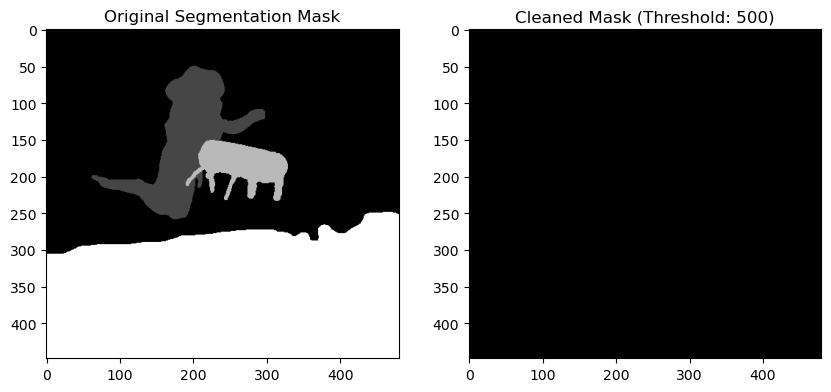

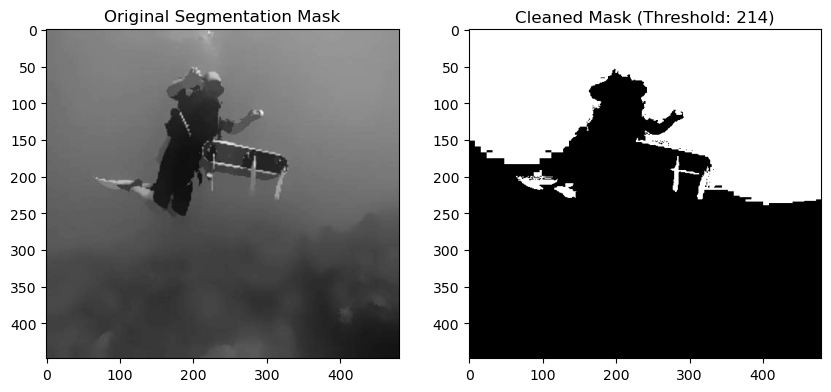

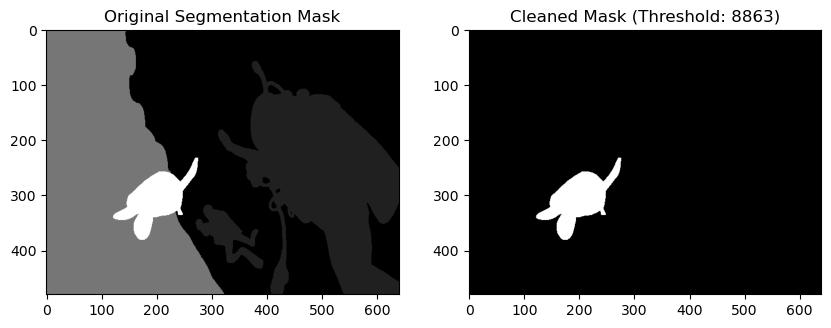

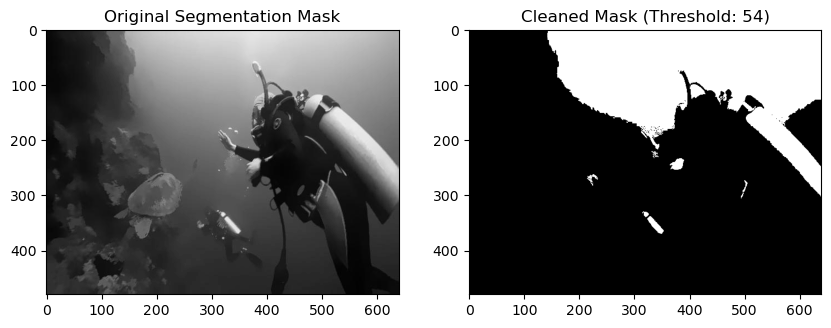

Skipping FV: Unable to read file.


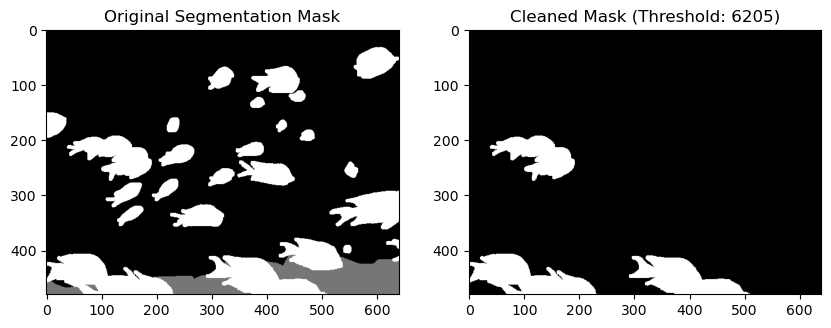

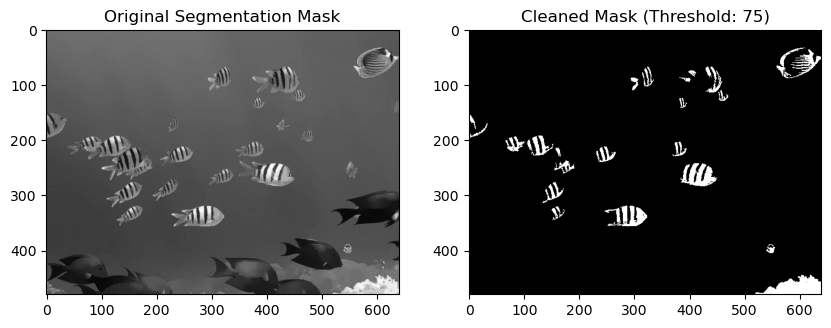

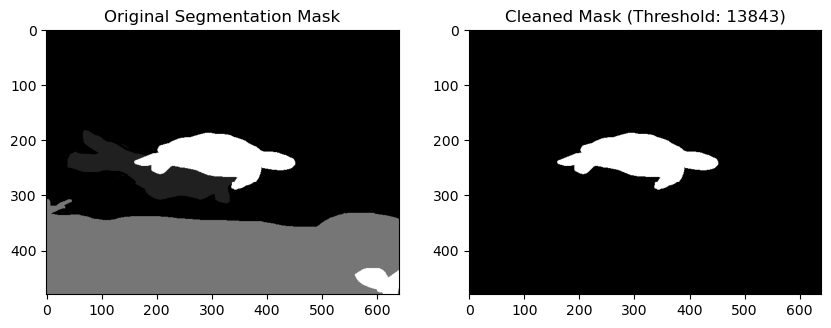

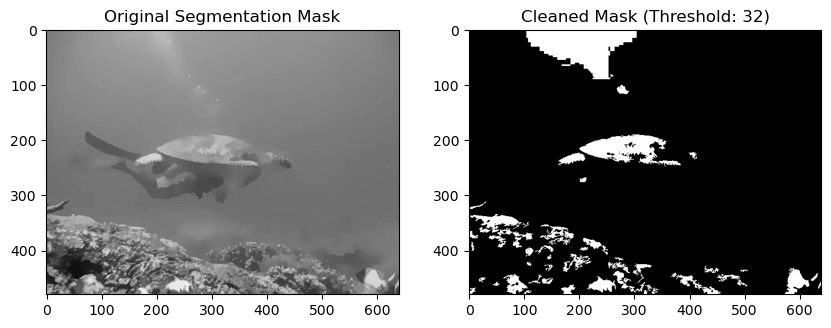

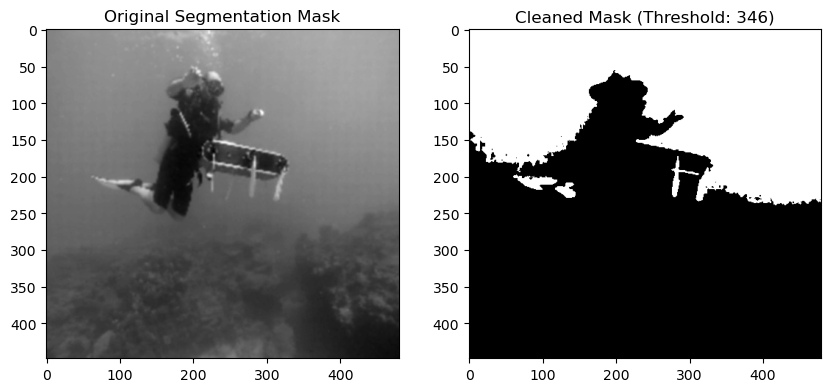

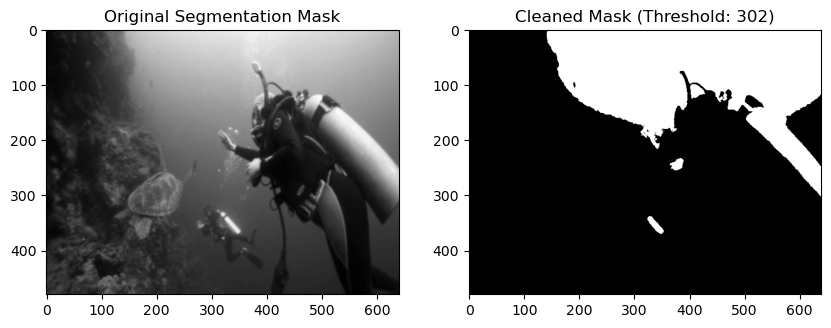

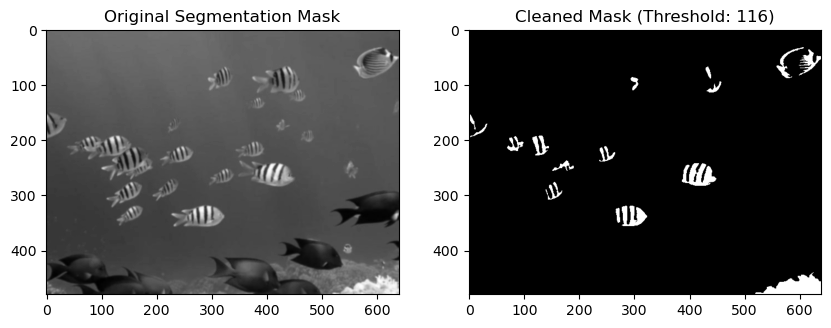

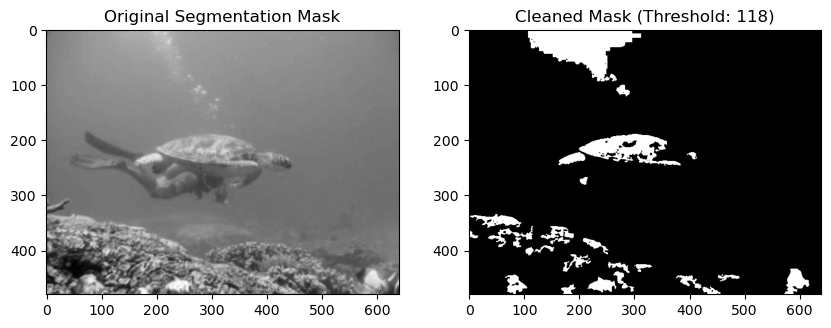

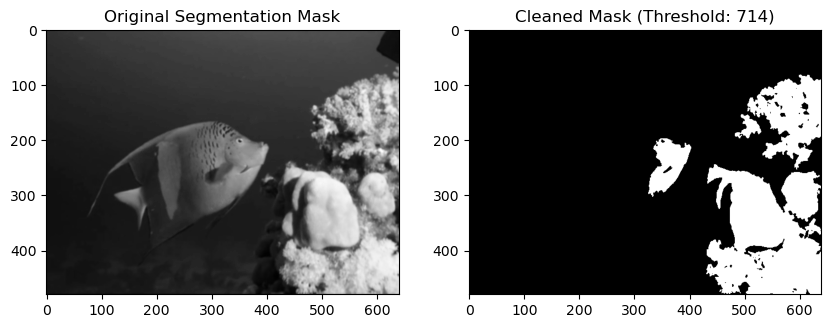

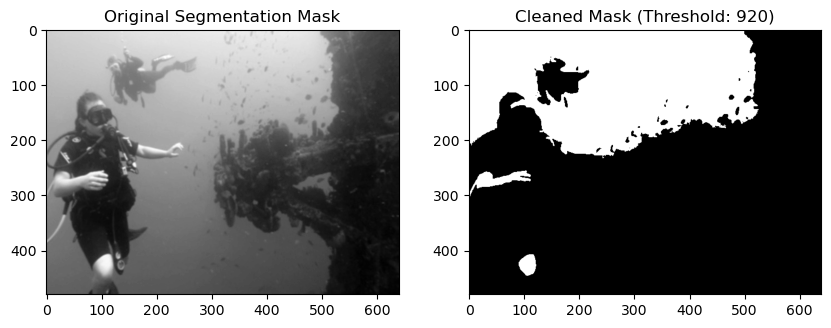

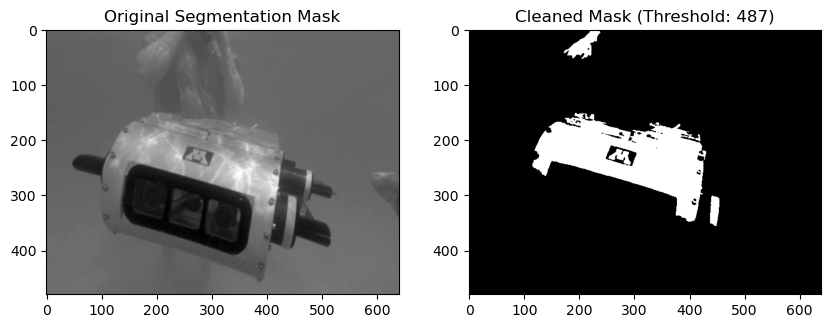

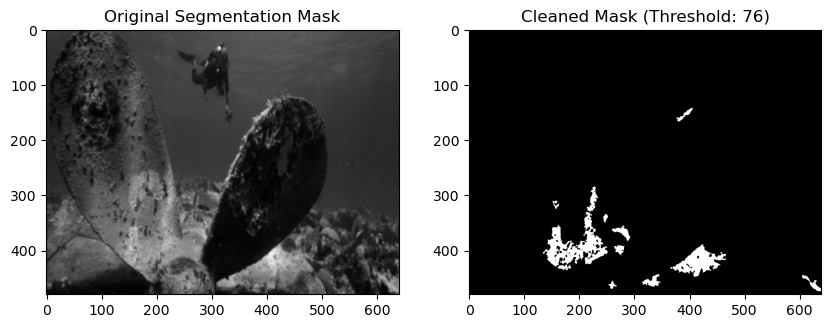

Skipping HD: Unable to read file.


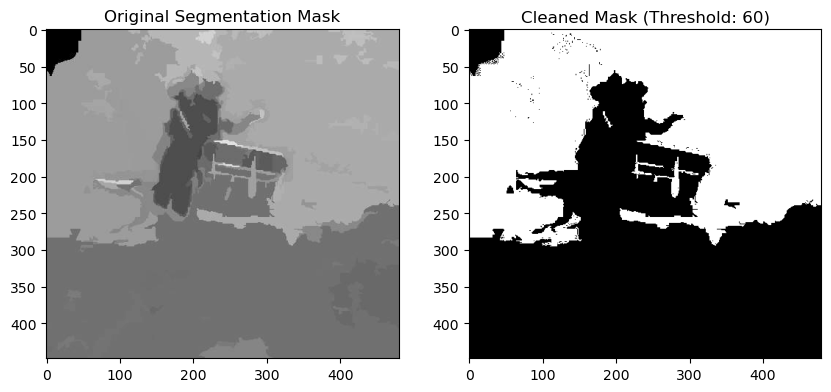

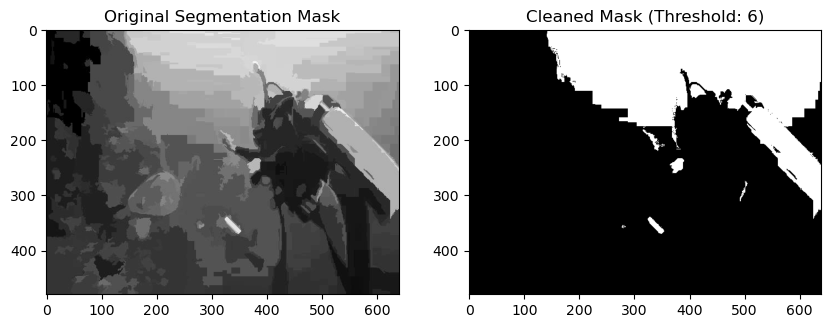

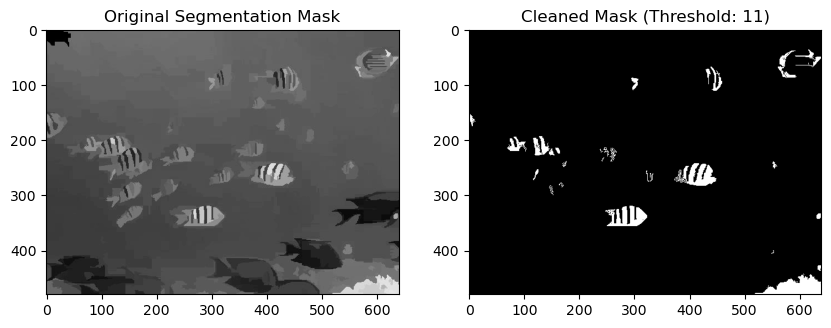

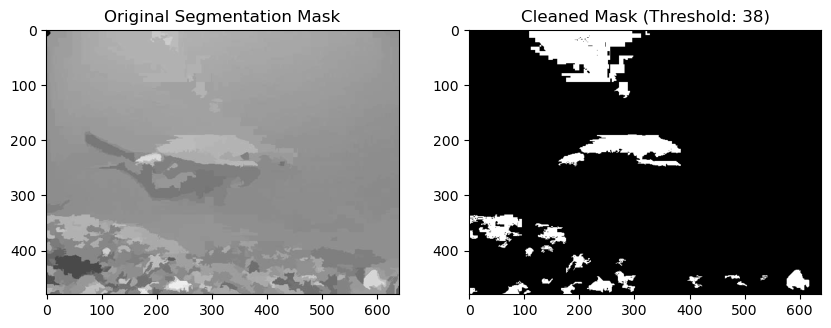

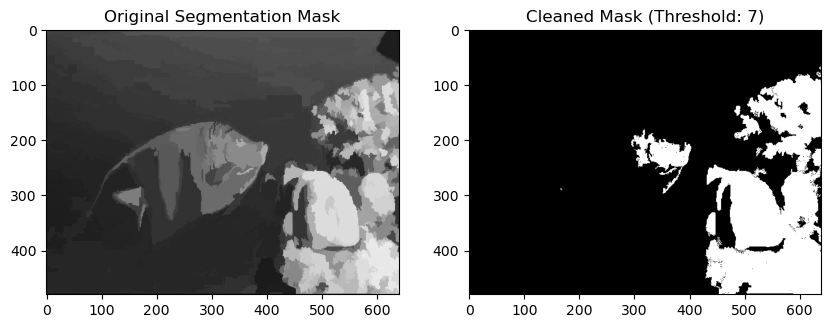

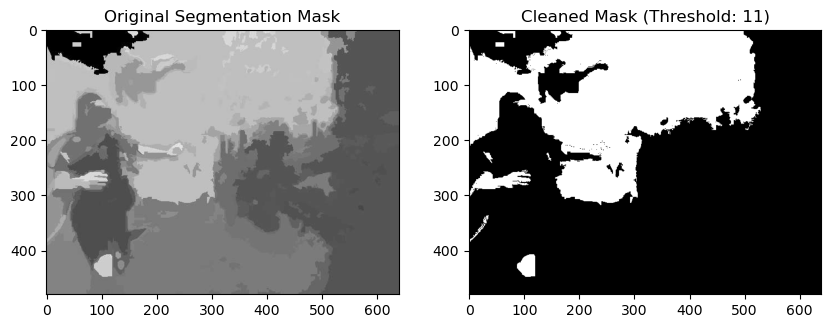

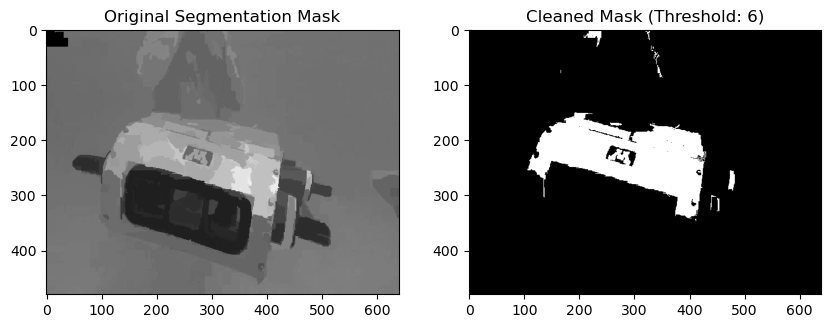

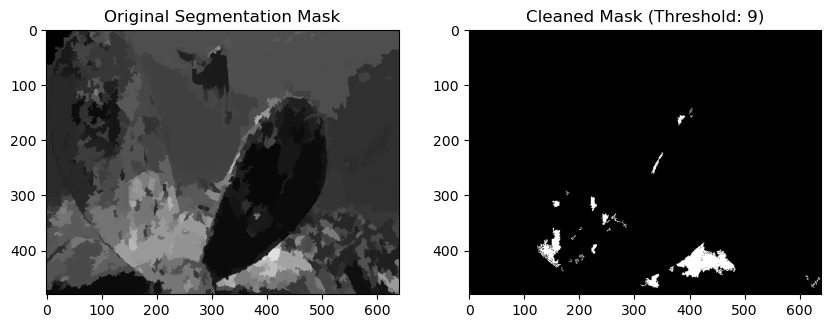

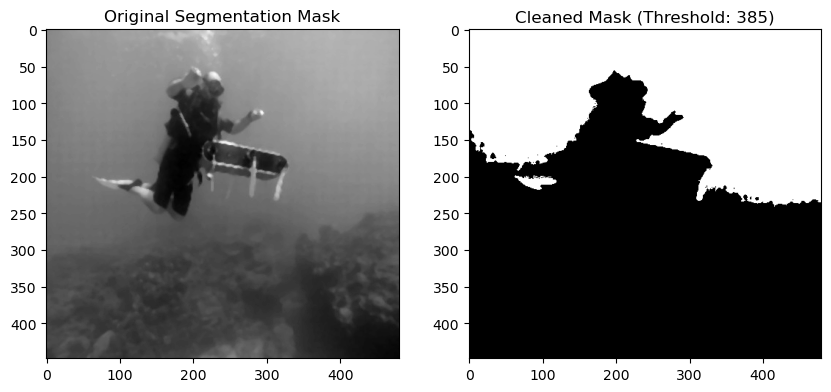

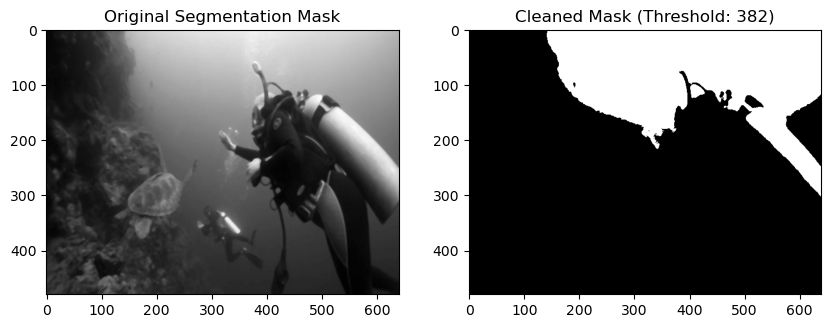

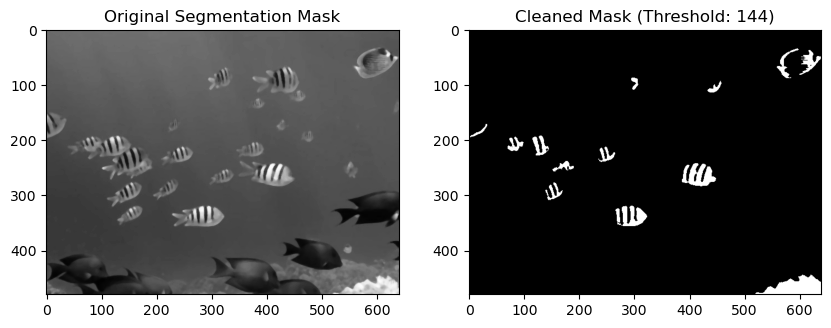

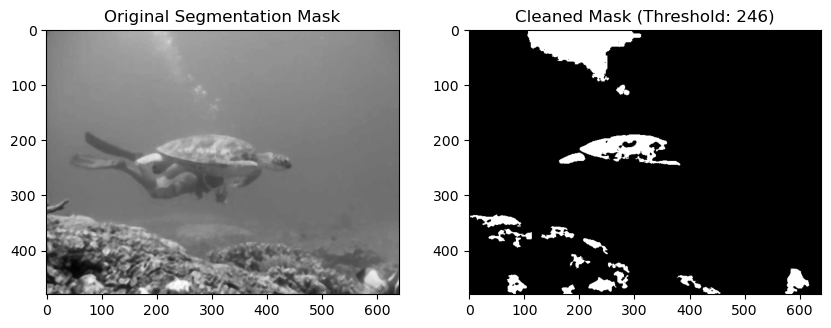

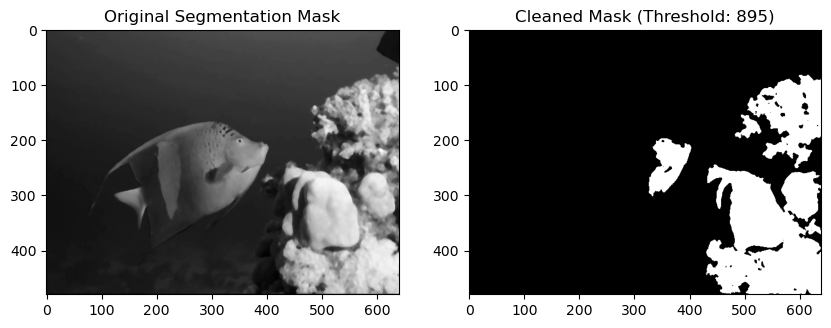

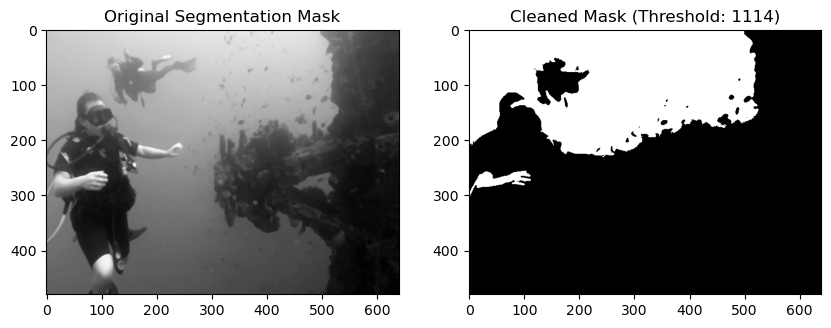

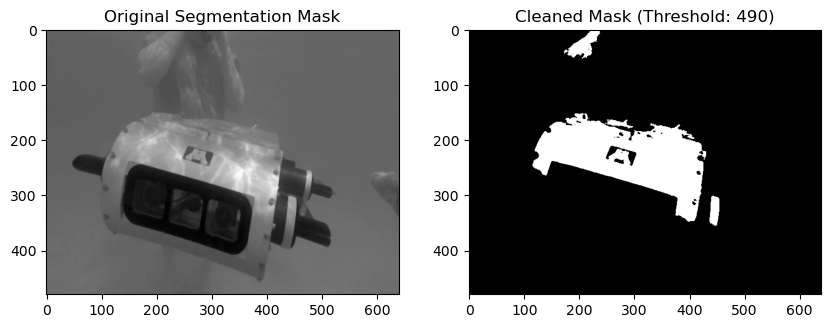

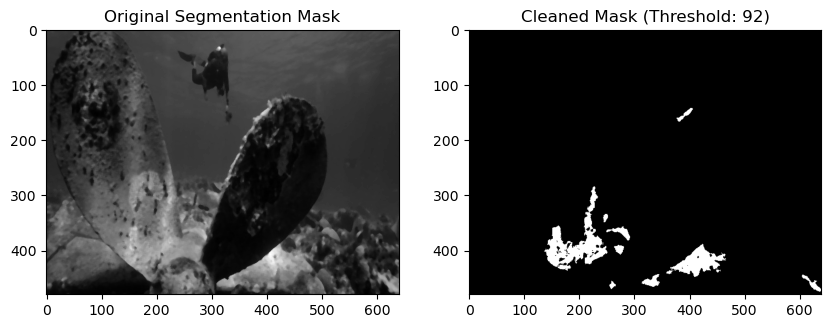

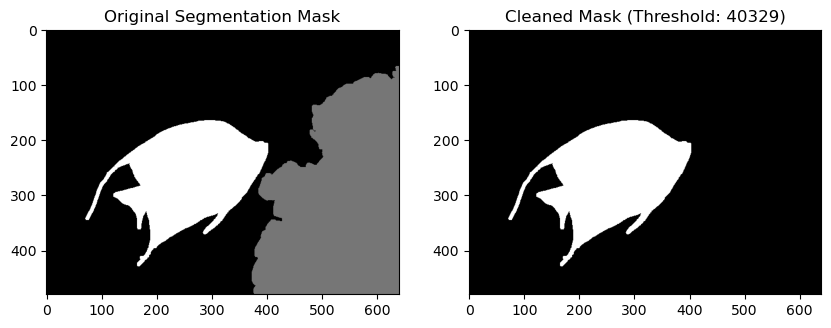

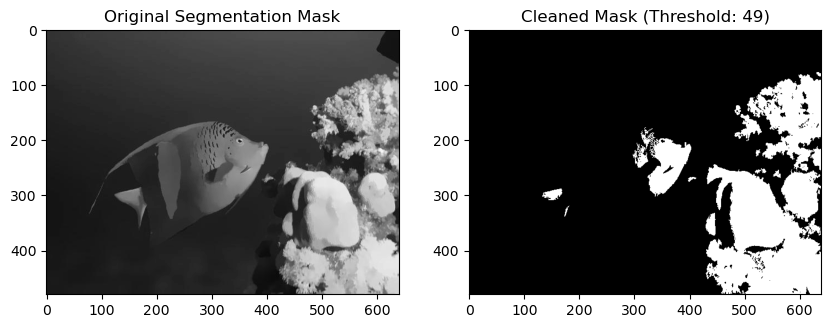

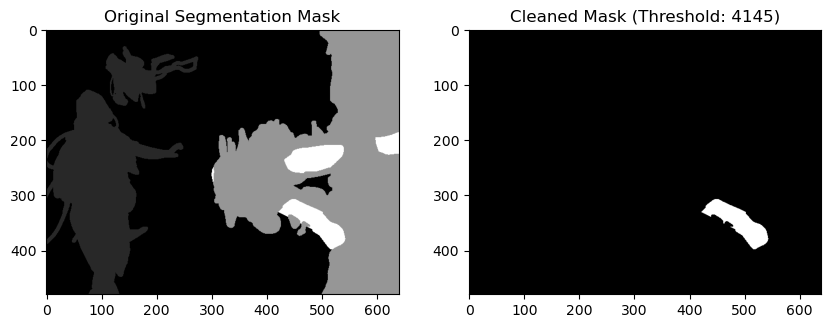

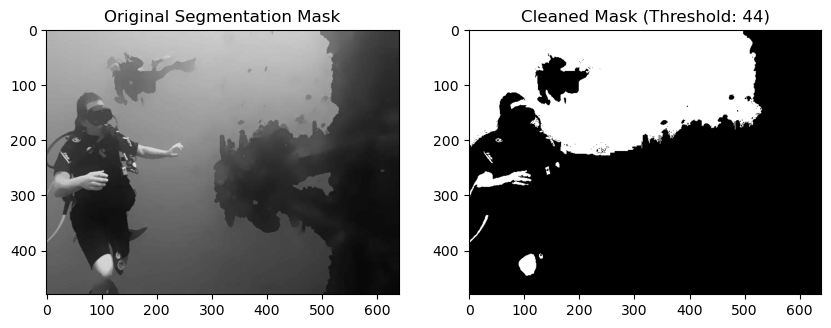

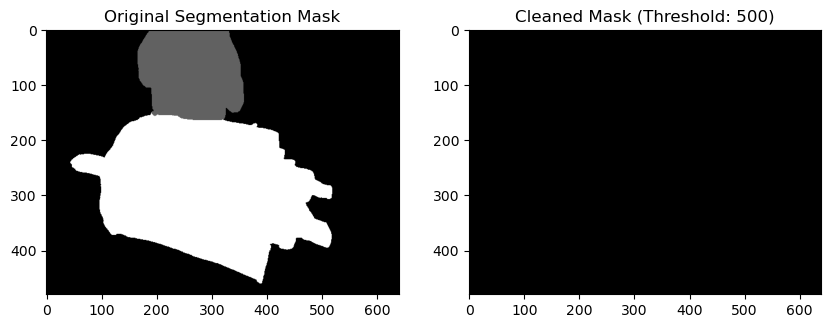

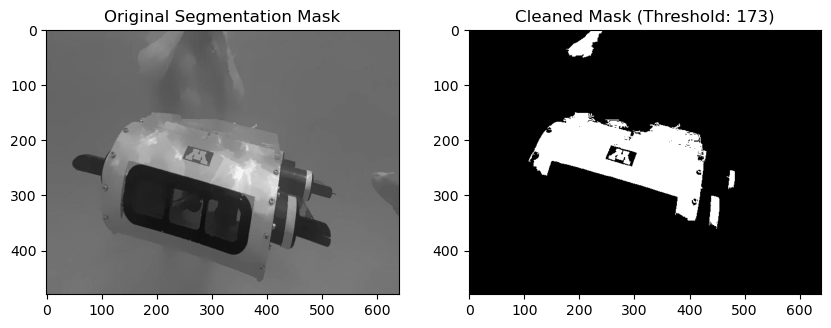

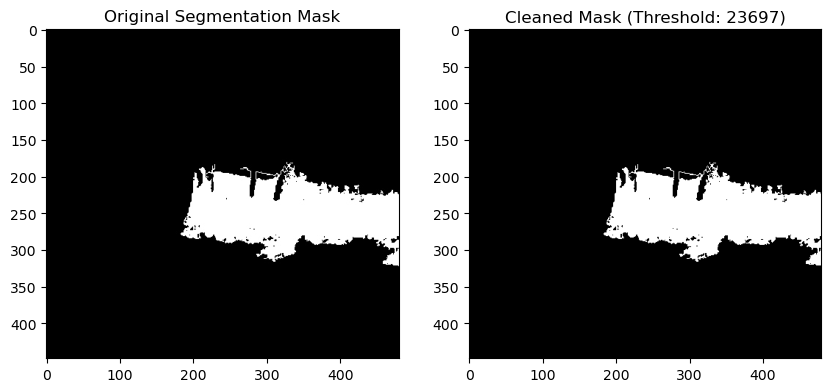

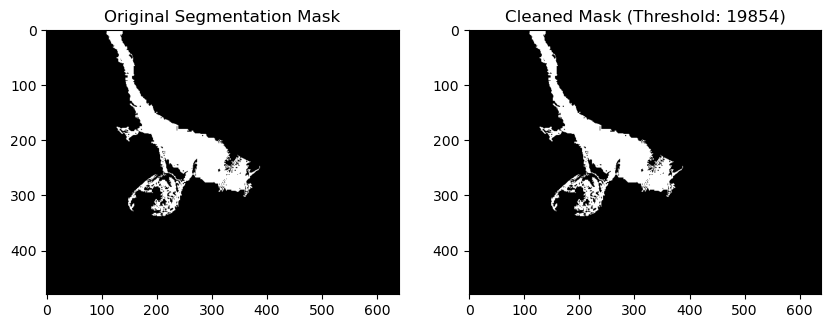

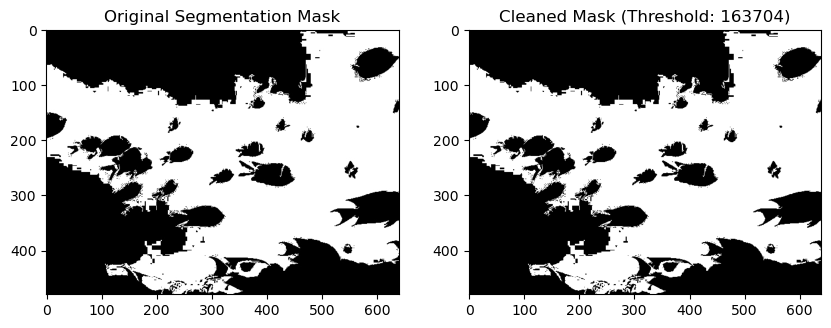

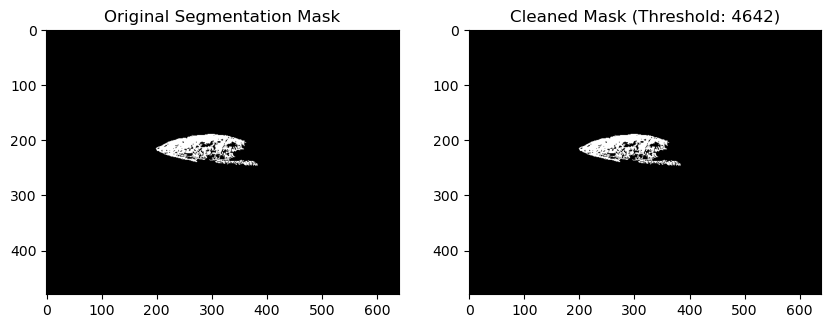

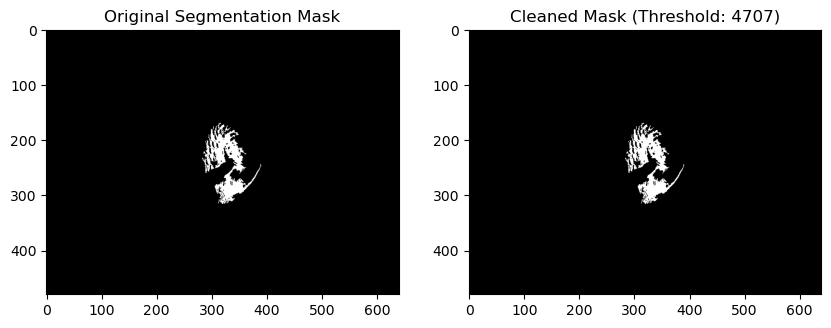

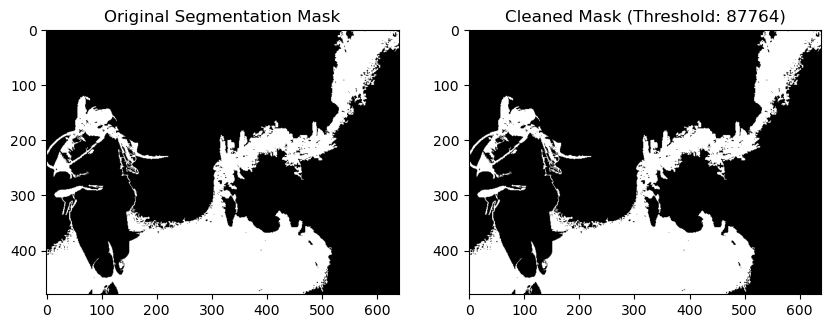

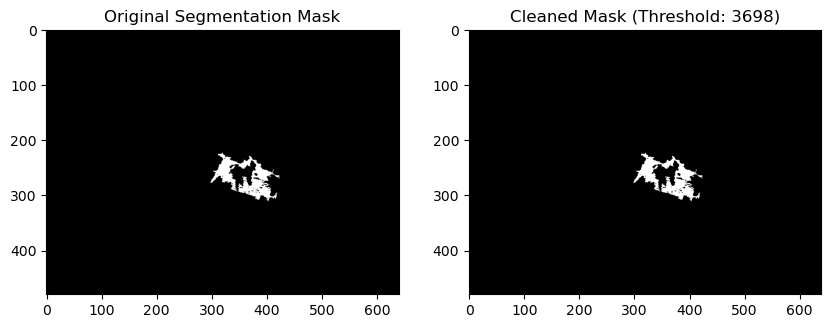

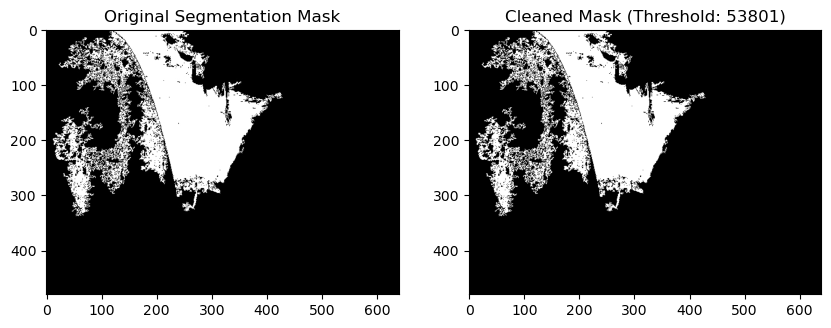

Skipping RI: Unable to read file.
Skipping RO: Unable to read file.


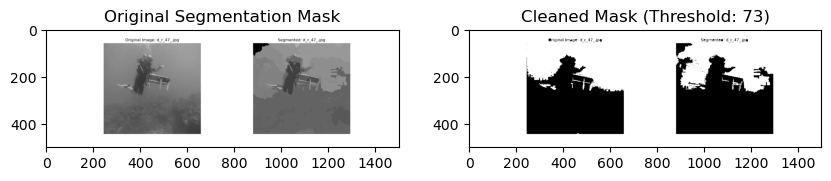

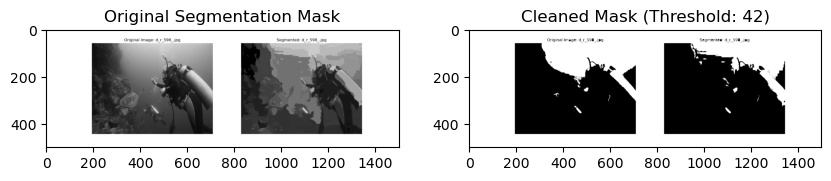

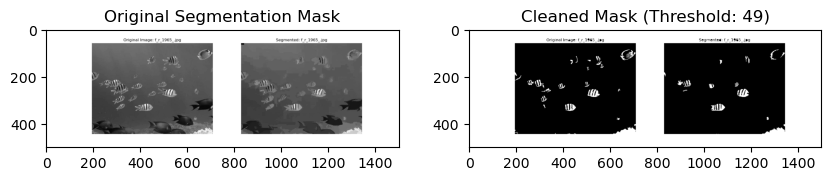

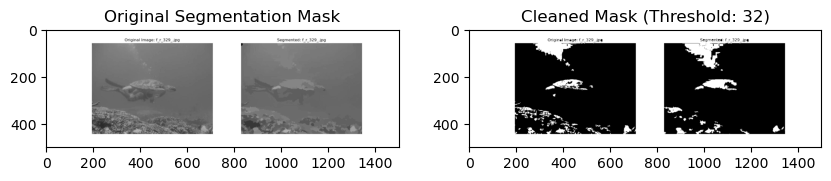

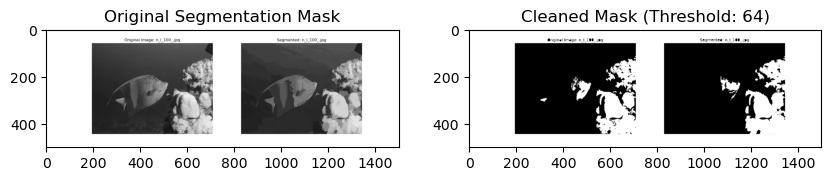

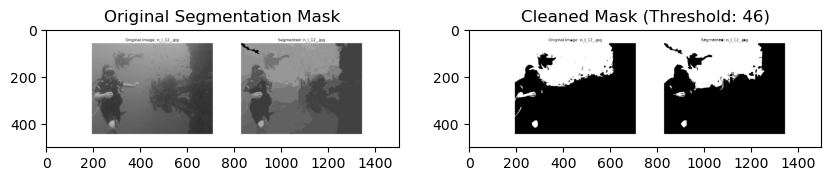

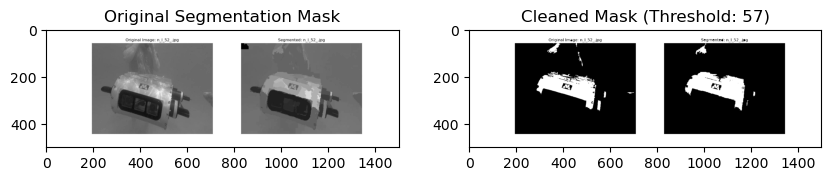

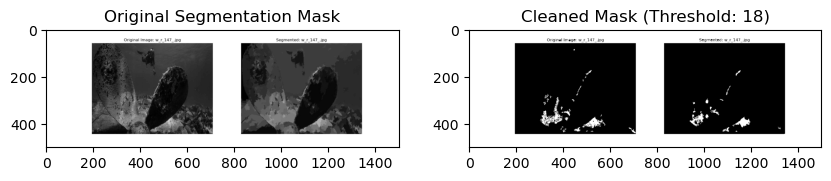

Skipping WR: Unable to read file.


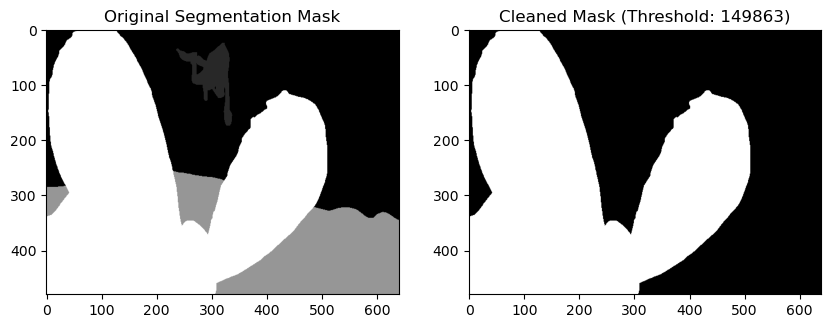

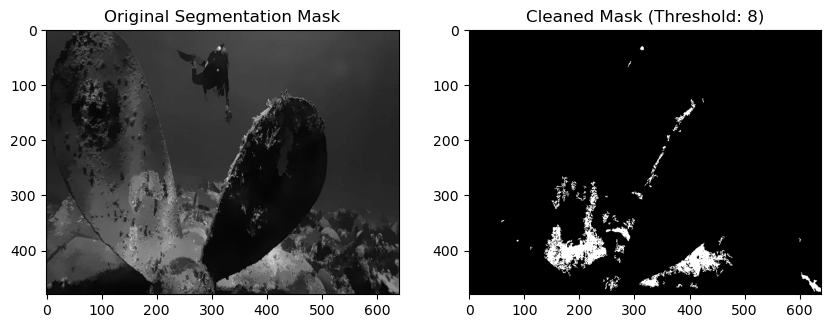

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to calculate adaptive area threshold based on mask properties
def adaptive_area_threshold(binary_image, percentile=90):
    """
    Computes an adaptive area threshold based on the distribution of connected component sizes.
    Uses a percentile of component sizes to determine the cutoff.
    """
    # Ensure the input is binary
    binary_image = cv2.threshold(binary_image, 127, 255, cv2.THRESH_BINARY)[1]

    # Convert to uint8
    binary_image = binary_image.astype(np.uint8)

    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
    areas = stats[1:, cv2.CC_STAT_AREA]  # Ignore background (label 0)
    
    if len(areas) == 0:
        return 500  # Default fallback

    return np.percentile(areas, percentile)  # Dynamically adjust threshold

# Function to remove small connected regions
def remove_small_regions(binary_image, min_size):
    """
    Removes small noisy regions using Connected Component Analysis (CCA).
    """
    # Ensure the input is binary
    binary_image = cv2.threshold(binary_image, 127, 255, cv2.THRESH_BINARY)[1]

    # Convert to uint8
    binary_image = binary_image.astype(np.uint8)

    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
    cleaned_mask = np.zeros_like(binary_image)

    for i in range(1, num_labels):  # Ignore background
        if stats[i, cv2.CC_STAT_AREA] >= min_size:
            cleaned_mask[labels == i] = 255

    return cleaned_mask

# Folder paths
mask_folder = "C:/Users/USER/Desktop/test/masks/"
output_folder = "C:/Users/USER/Desktop/test/masks_cleaned/"
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(mask_folder):
    mask_path = os.path.join(mask_folder, filename)
    
    # Read the binary segmentation mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Check if the mask is valid
    if mask is None:
        print(f"Skipping {filename}: Unable to read file.")
        continue

    # Compute adaptive threshold
    adaptive_threshold = adaptive_area_threshold(mask, percentile=90)
    
    # Apply CCA with adaptive filtering
    cleaned_mask = remove_small_regions(mask, min_size=int(adaptive_threshold))

    # Save cleaned mask
    output_path = os.path.join(output_folder, f"cleaned_{filename}")
    cv2.imwrite(output_path, cleaned_mask)

    # Display results
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(mask, cmap='gray')
    ax[0].set_title("Original Segmentation Mask")

    ax[1].imshow(cleaned_mask, cmap='gray')
    ax[1].set_title(f"Cleaned Mask (Threshold: {int(adaptive_threshold)})")

    plt.show()


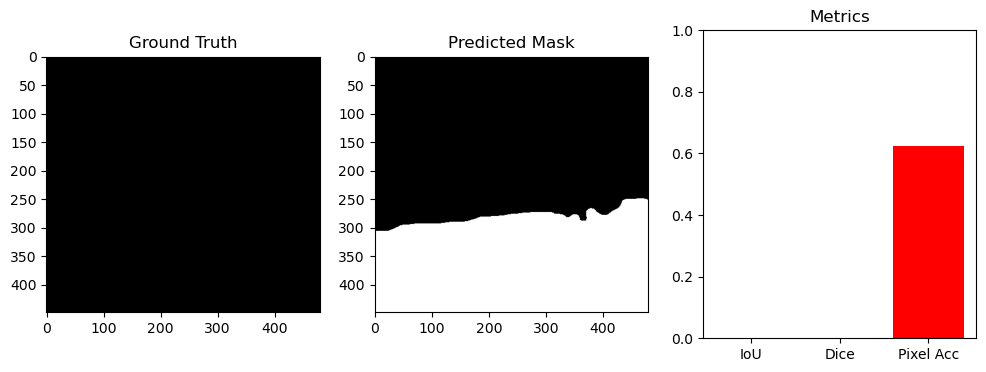

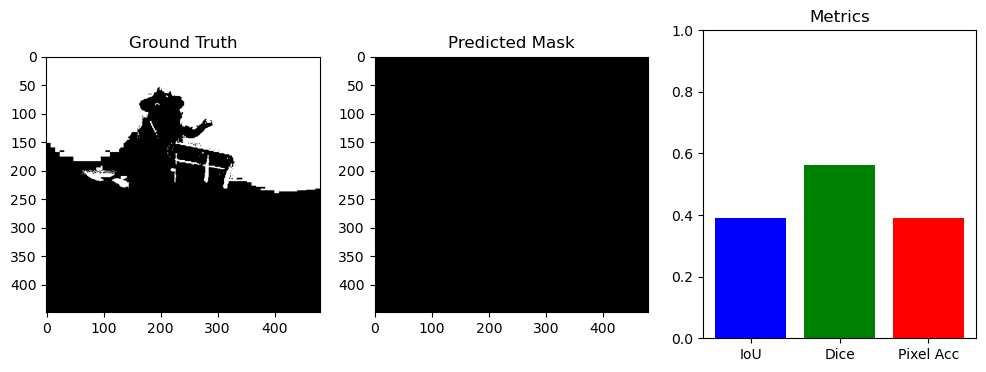

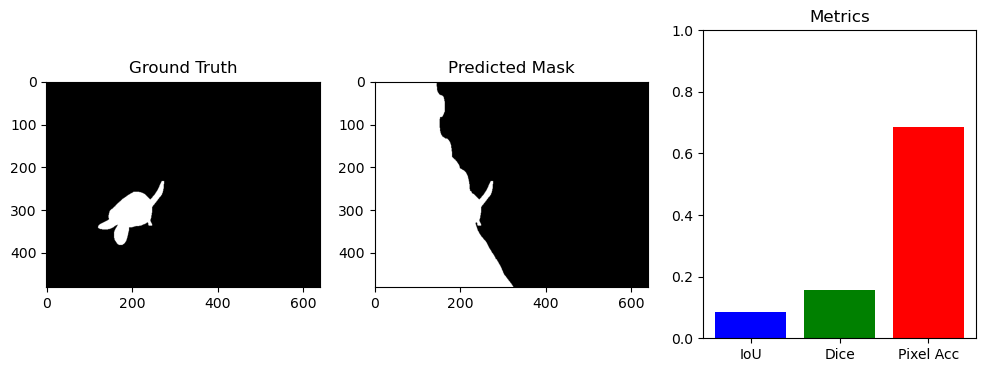

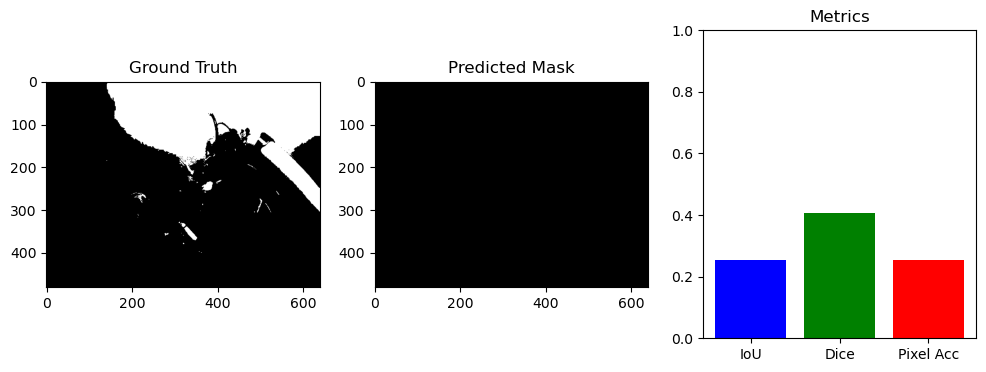

Skipping FV: File missing or unreadable.


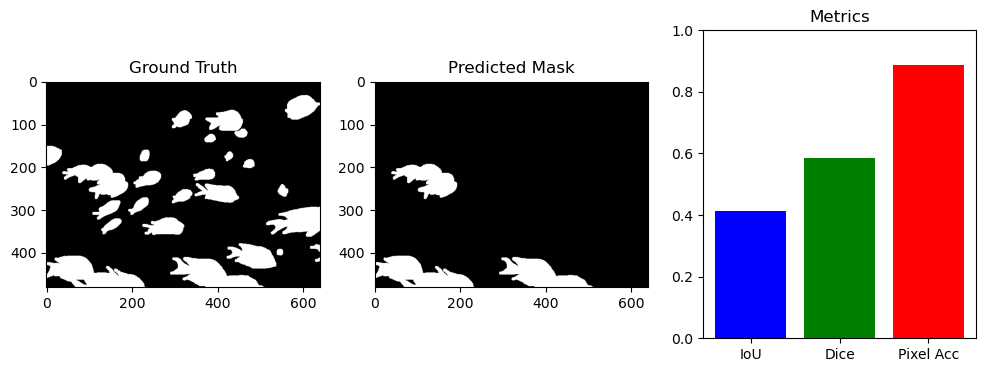

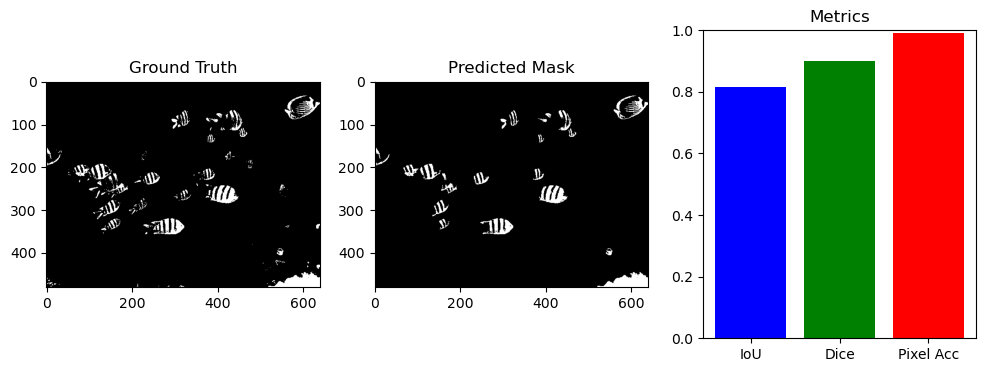

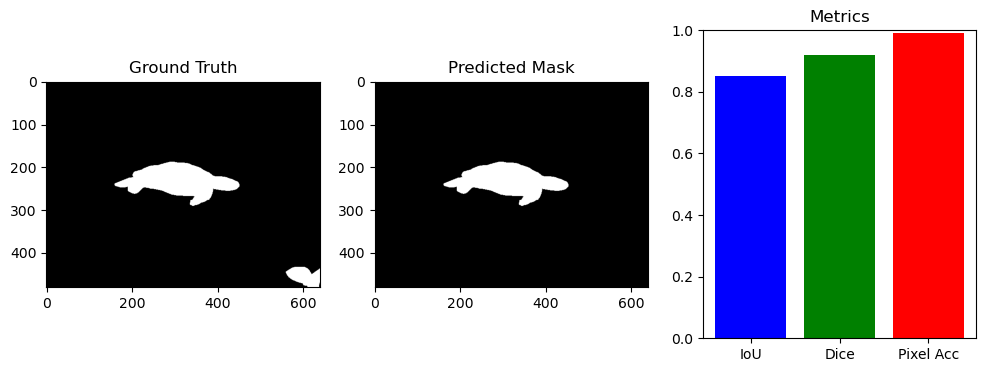

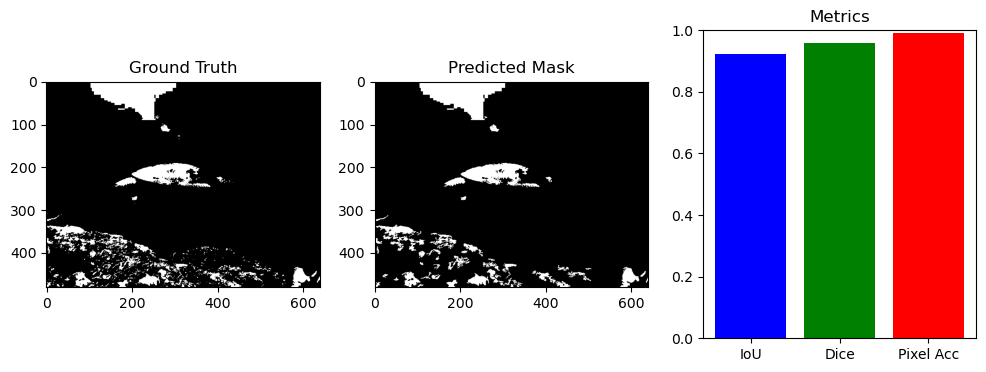

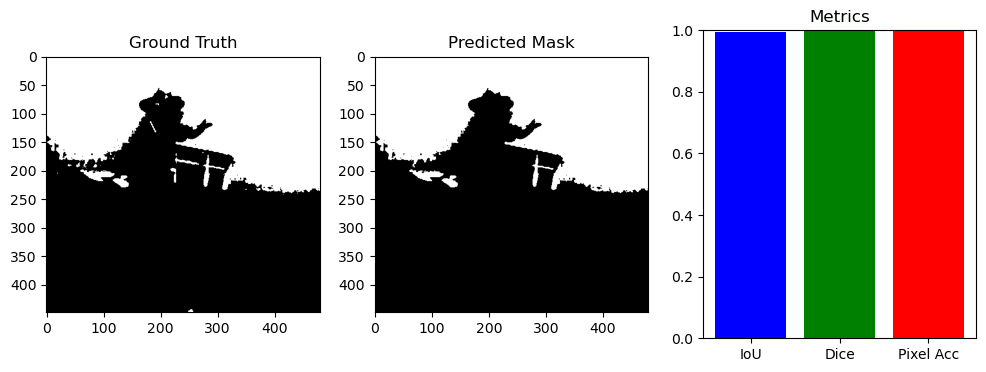

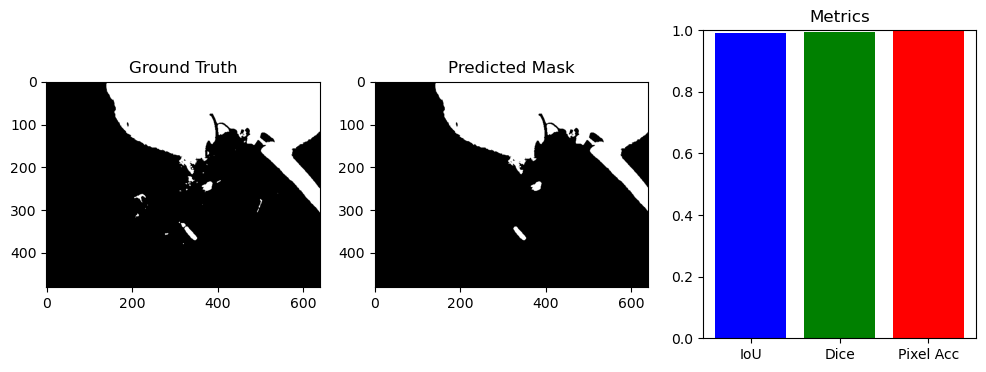

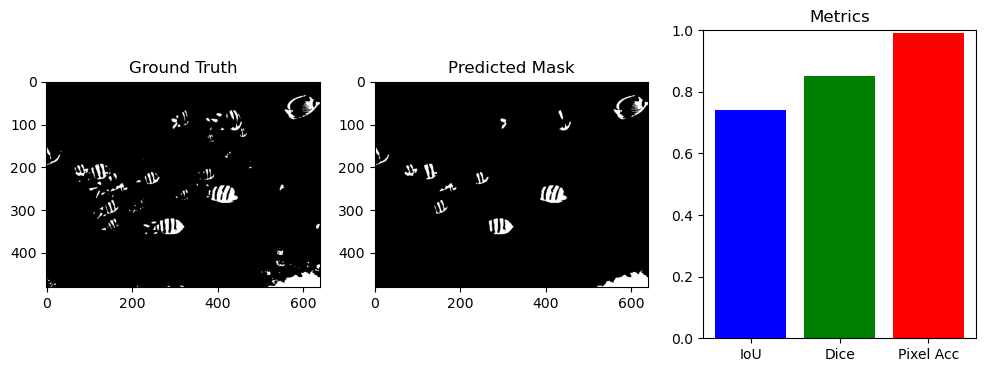

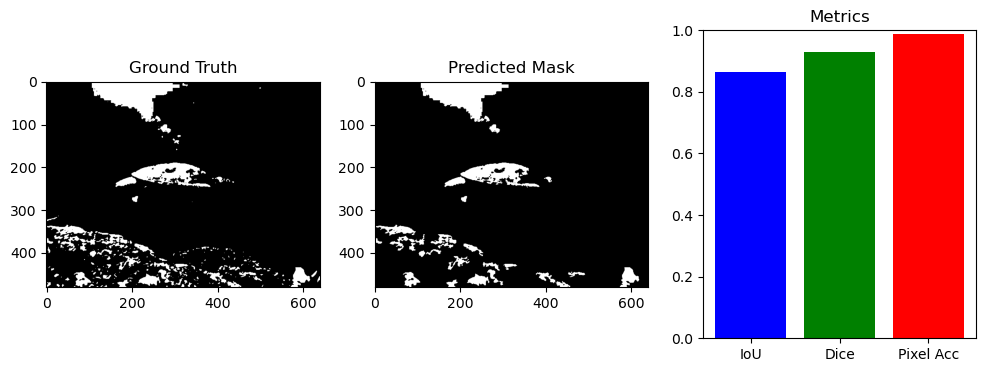

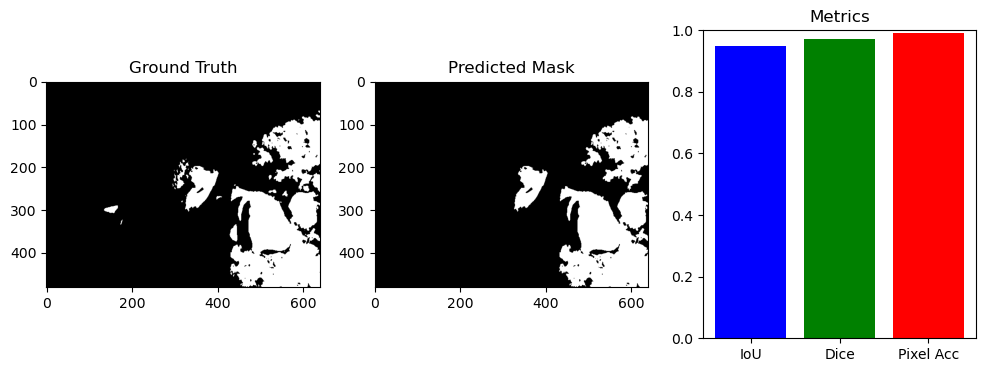

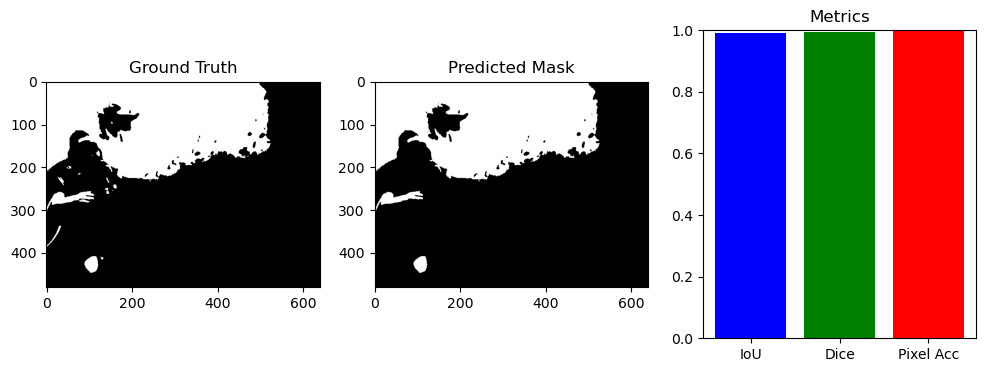

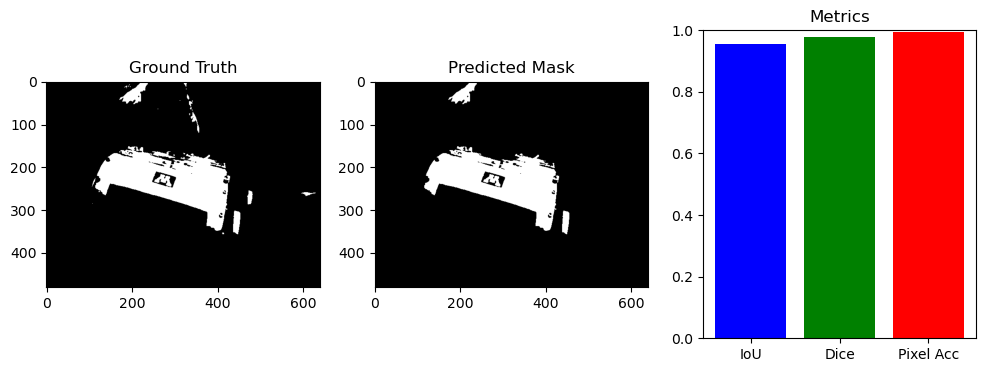

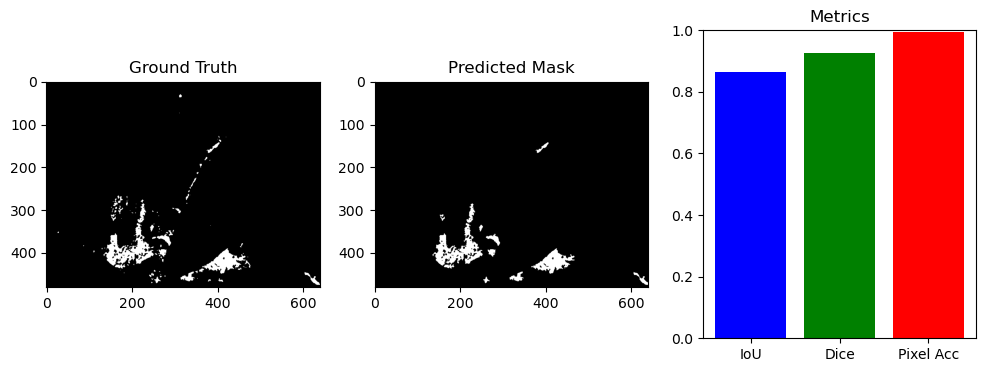

Skipping HD: File missing or unreadable.


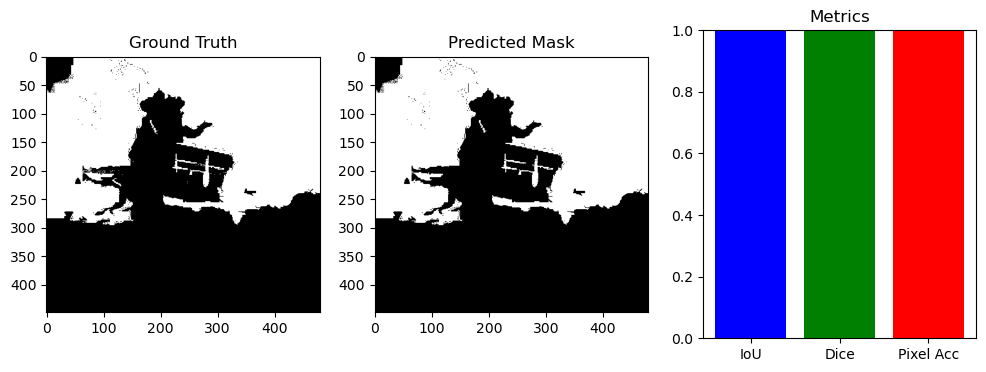

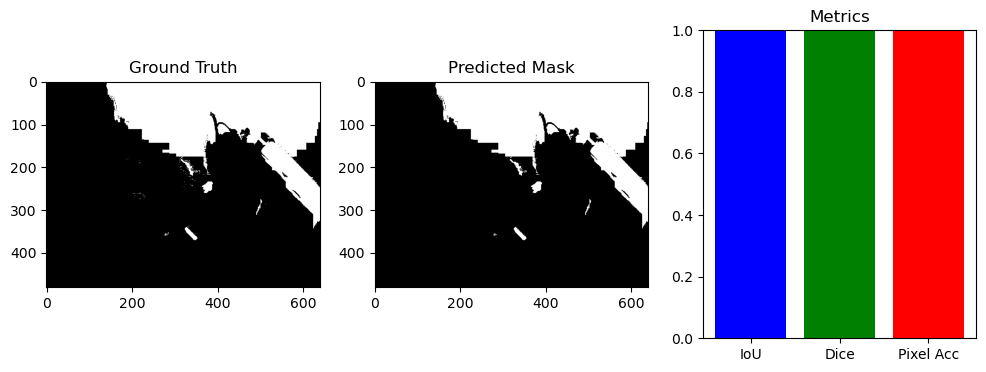

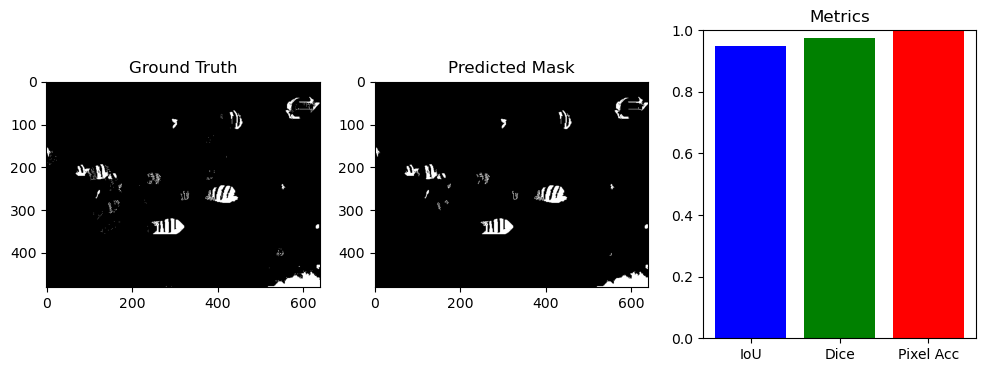

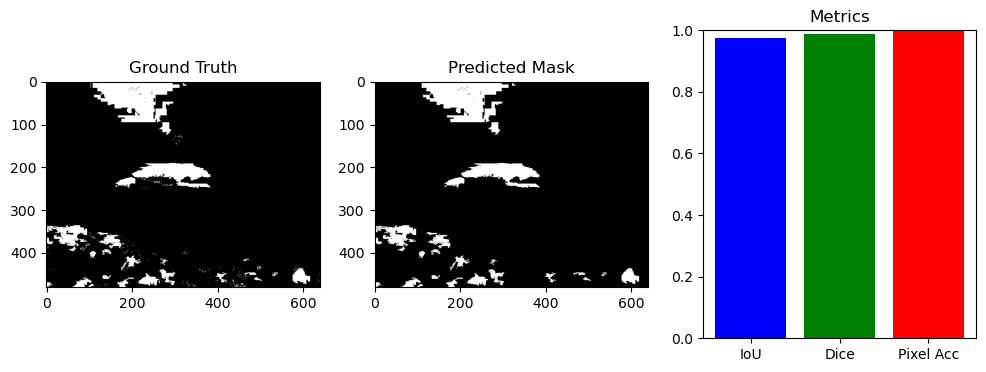

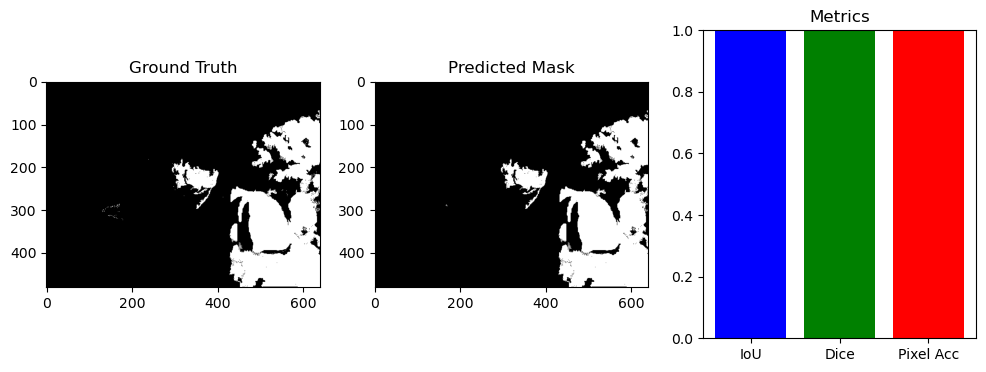

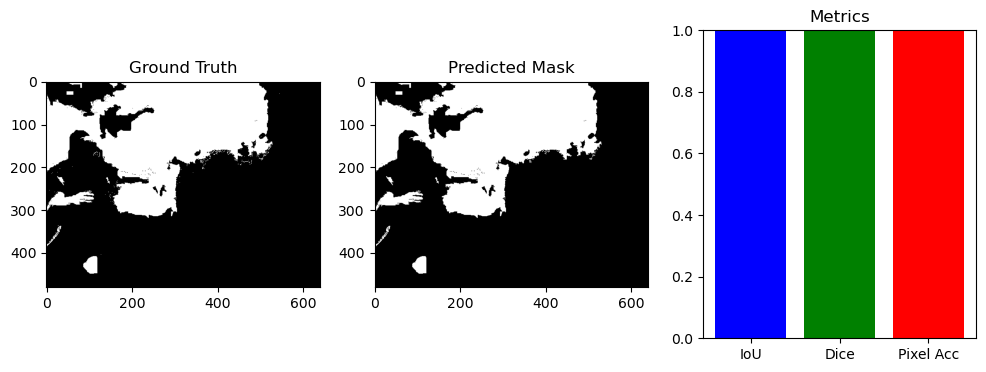

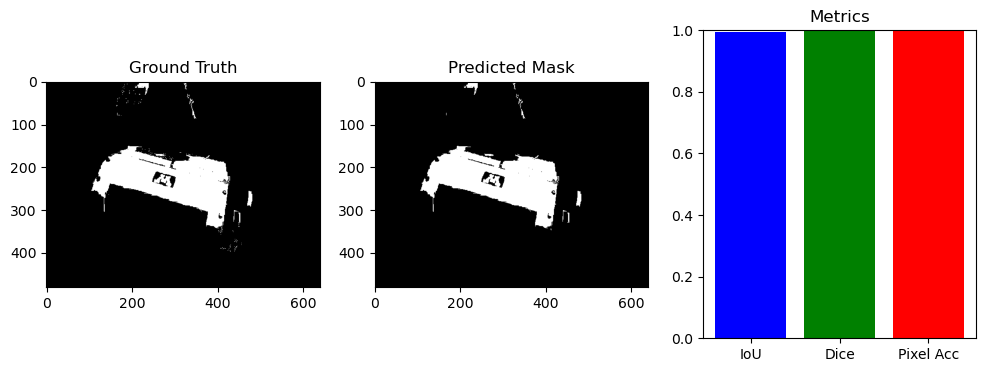

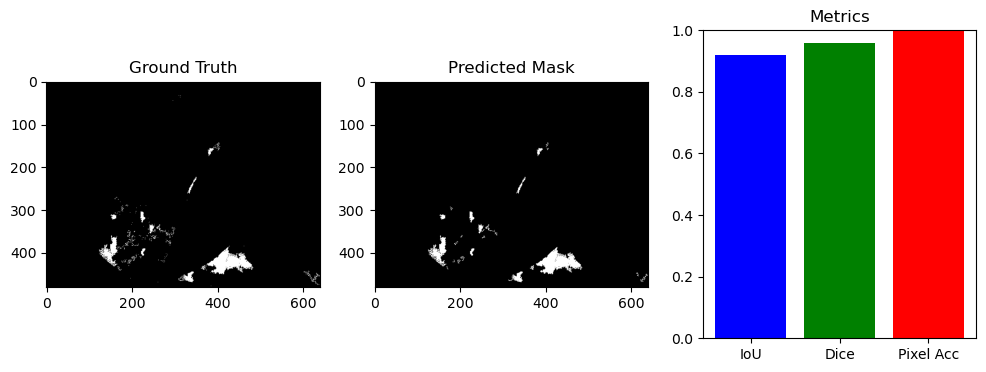

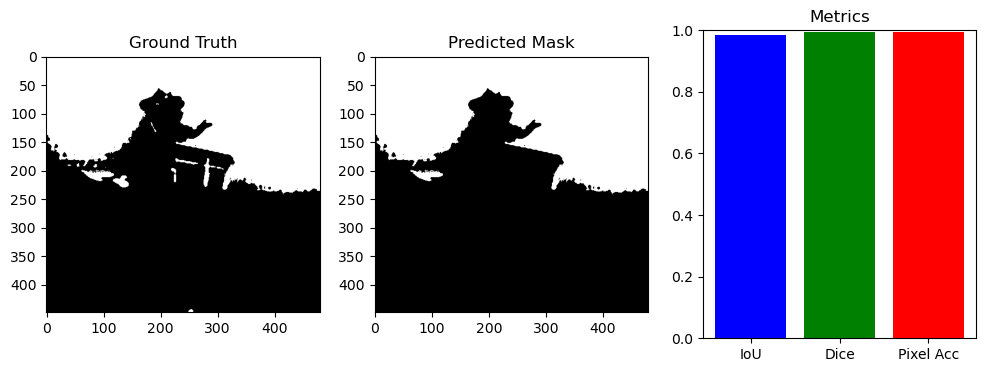

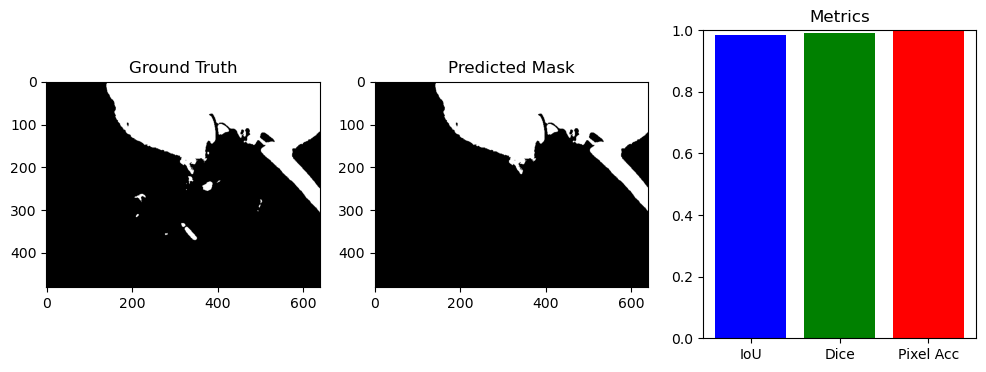

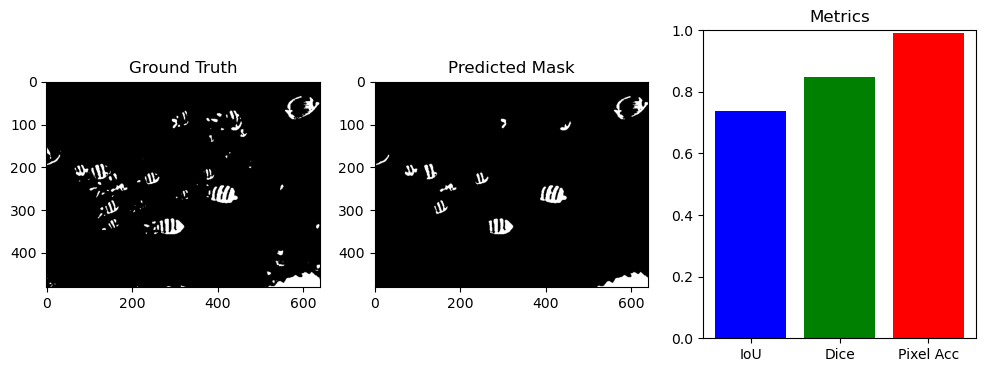

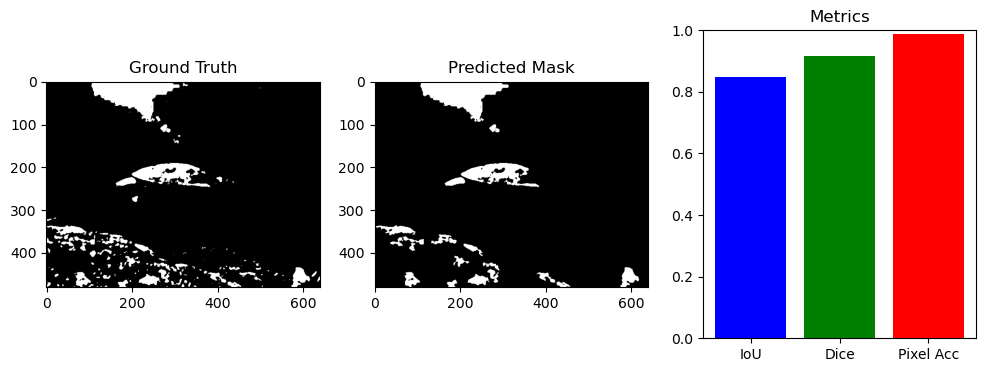

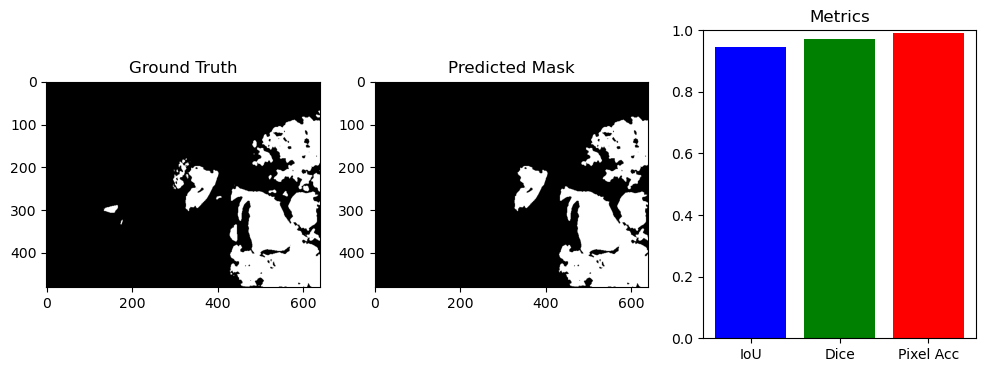

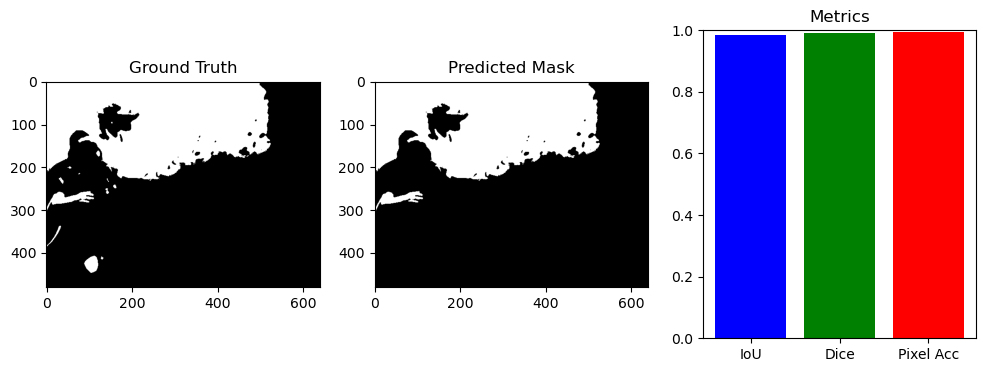

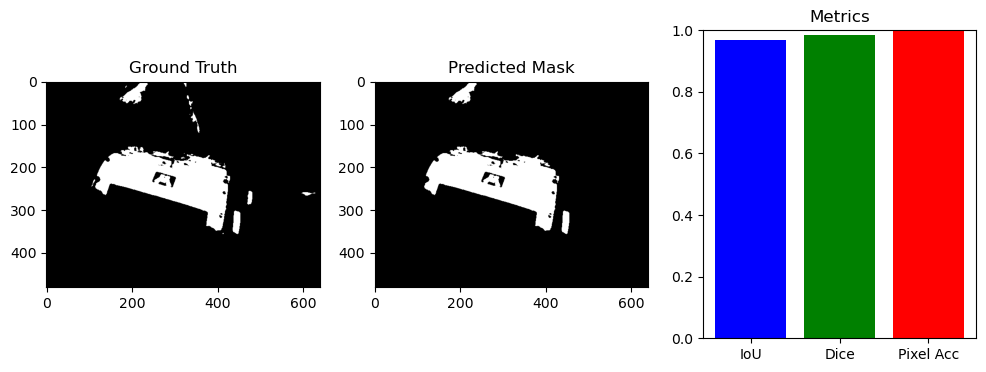

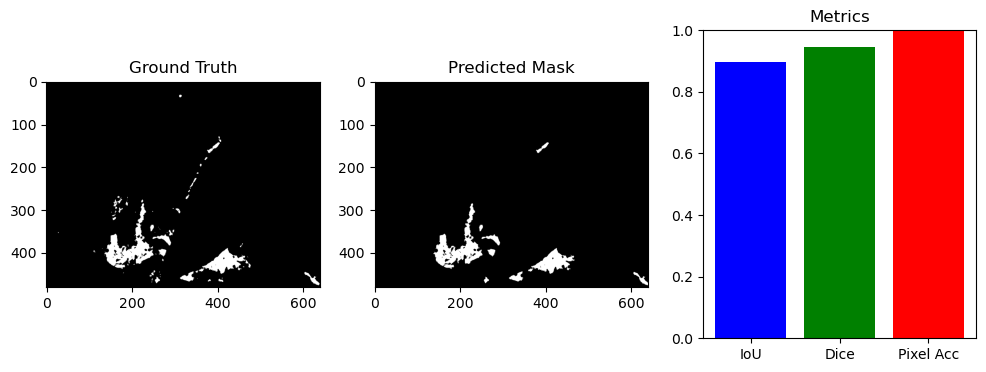

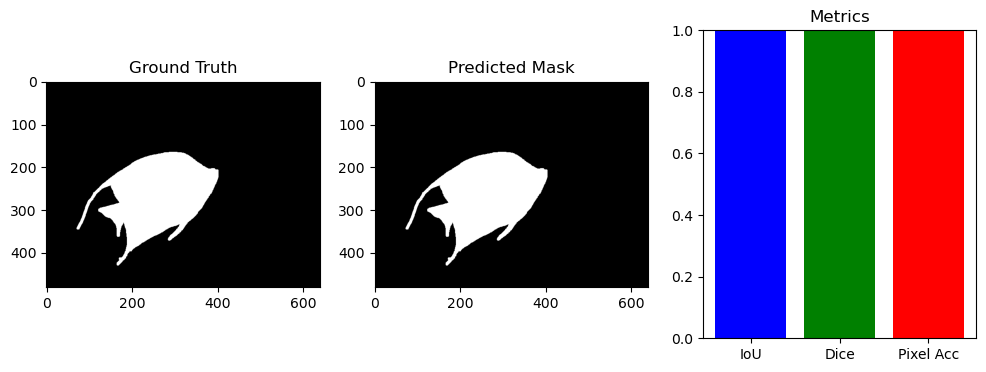

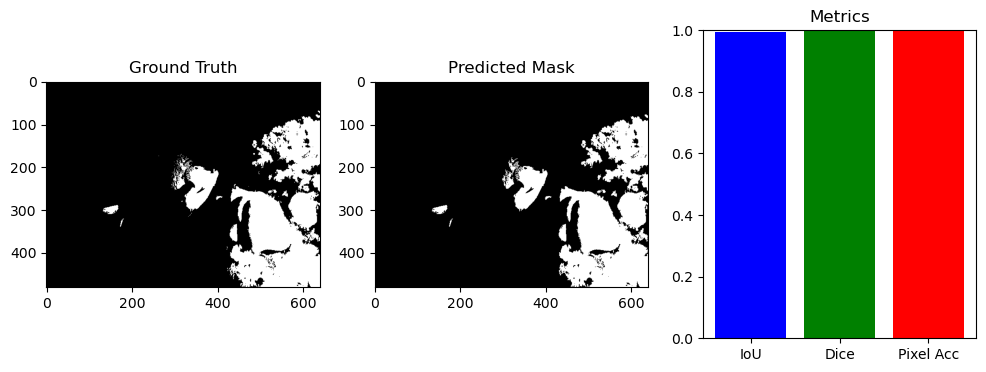

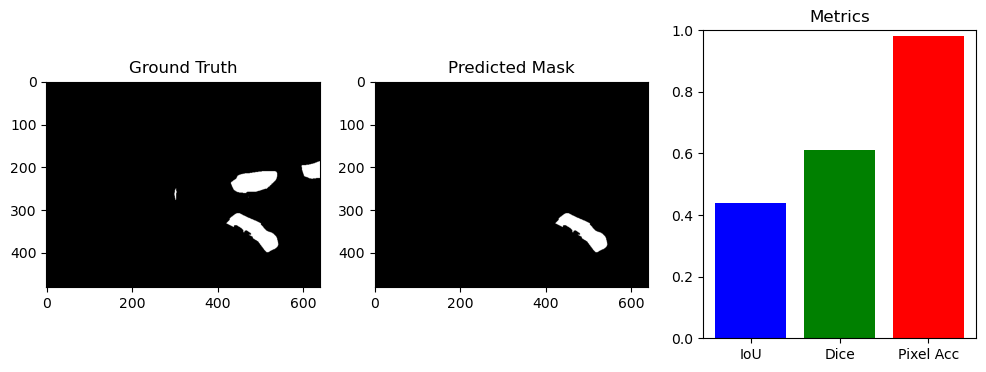

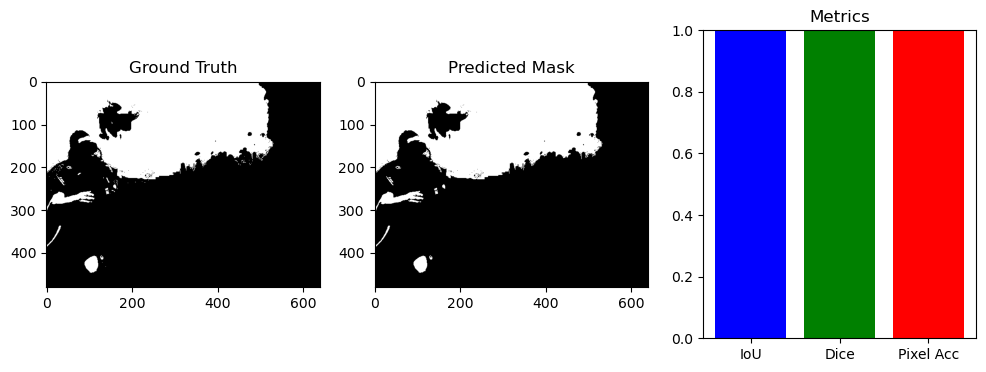

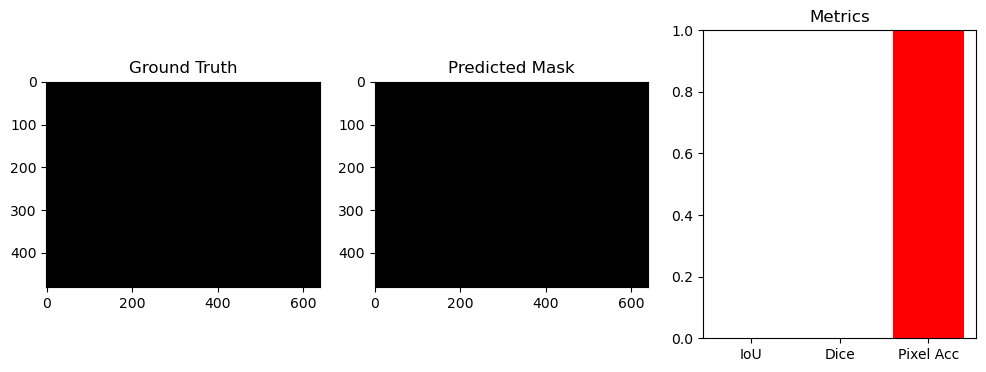

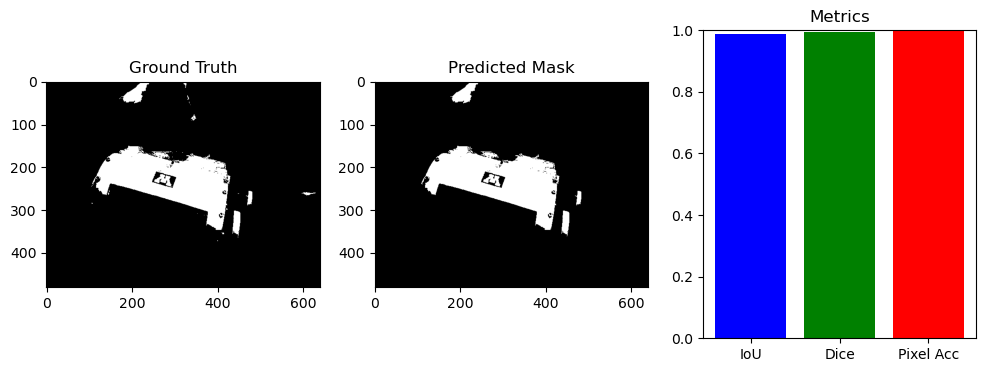

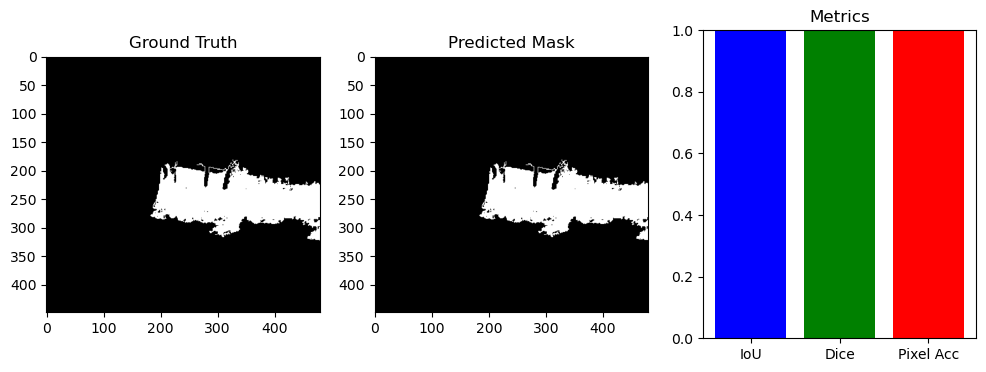

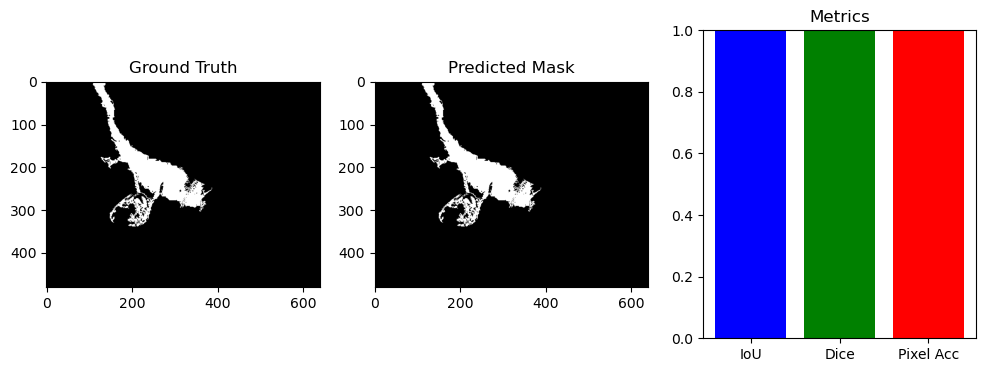

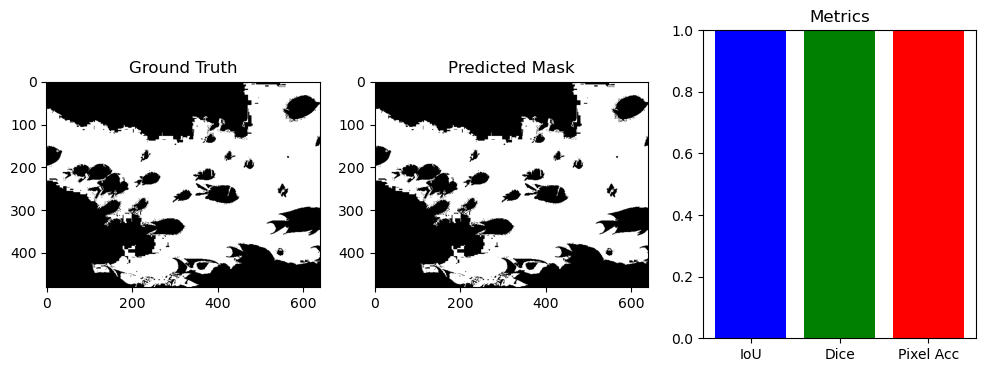

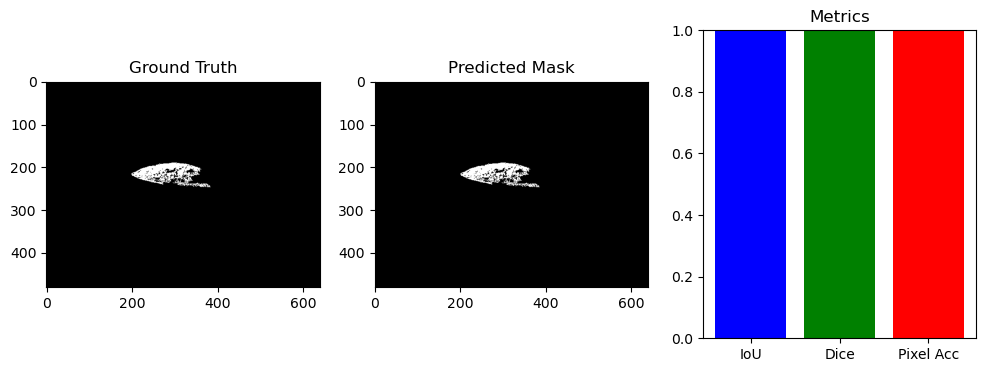

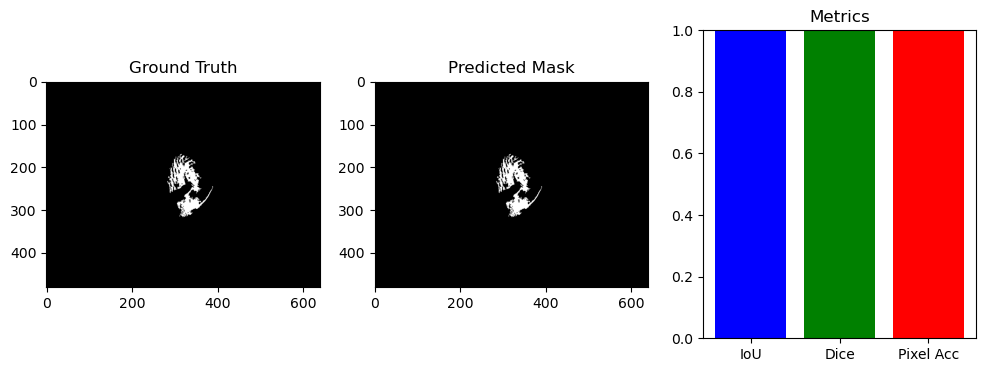

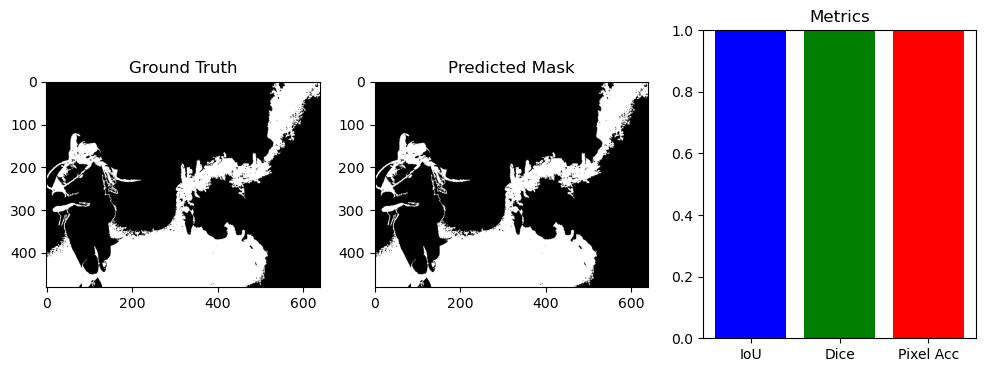

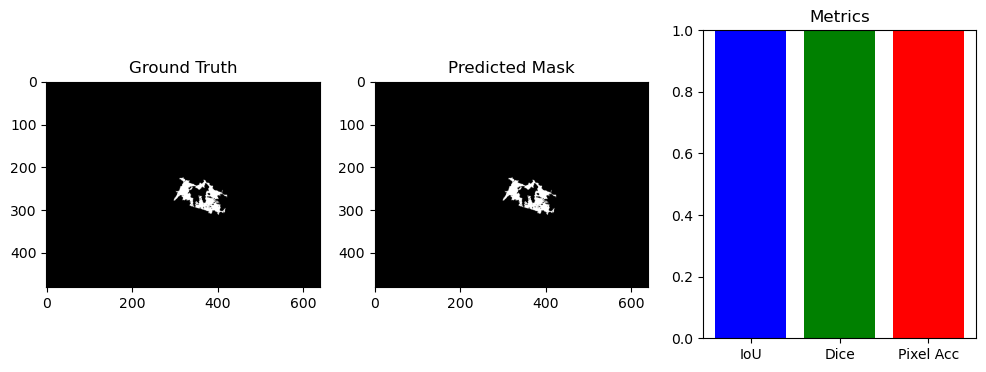

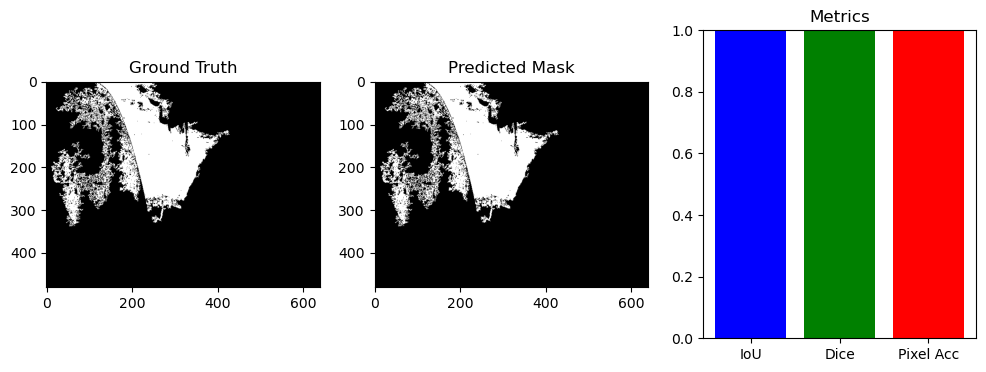

Skipping RI: File missing or unreadable.
Skipping RO: File missing or unreadable.


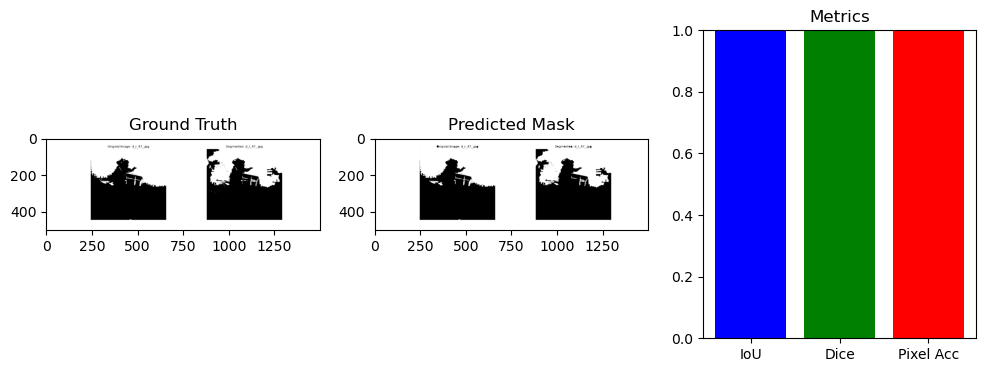

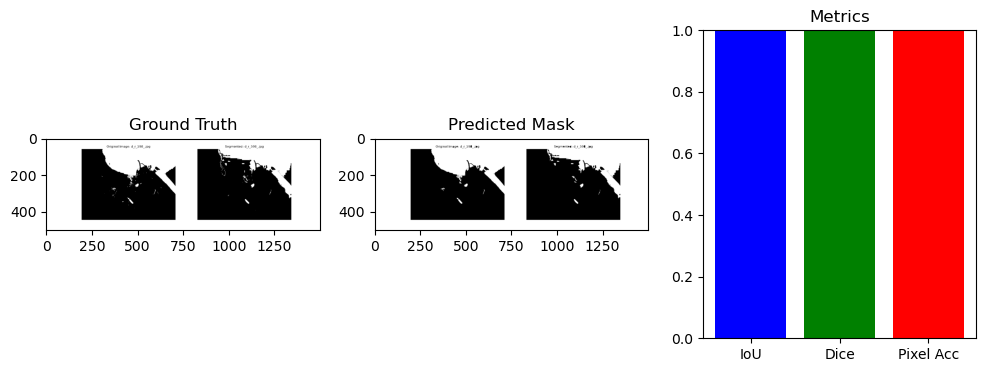

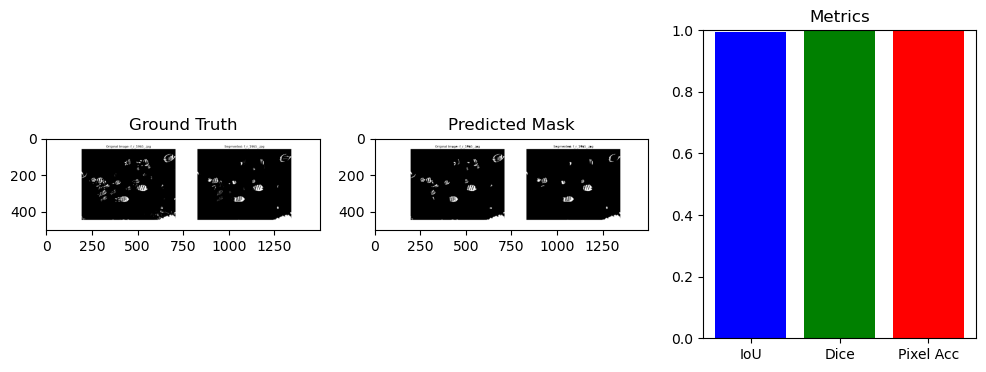

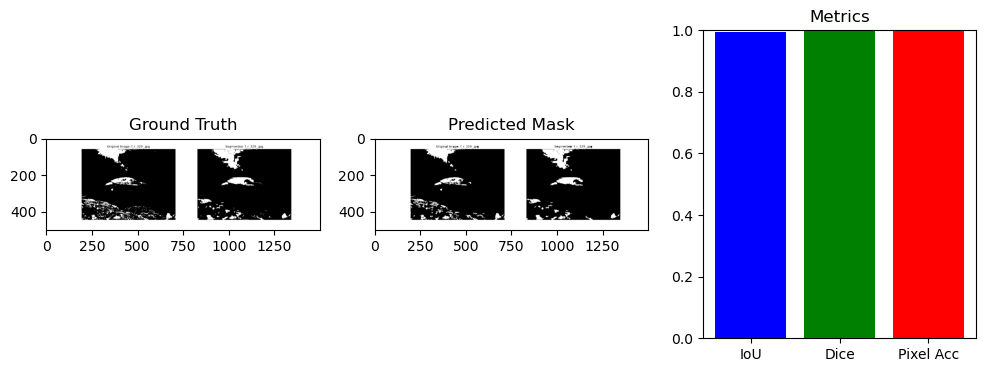

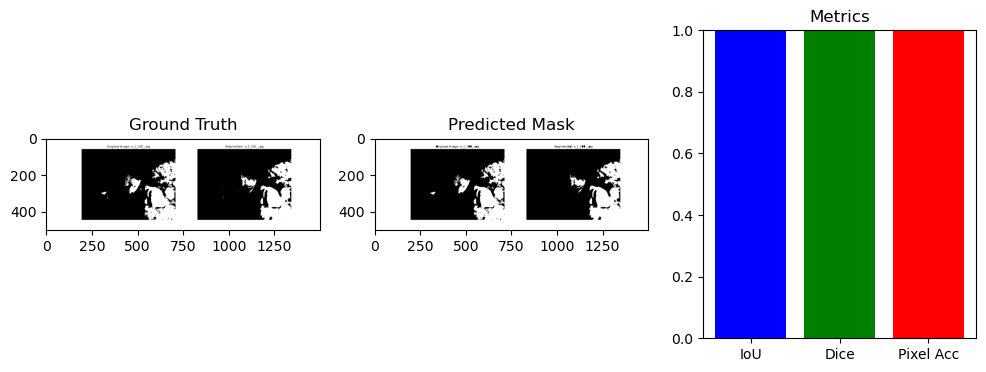

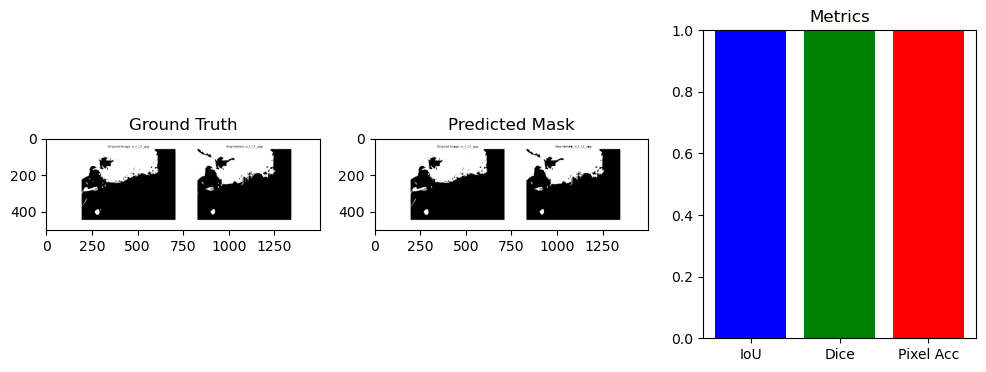

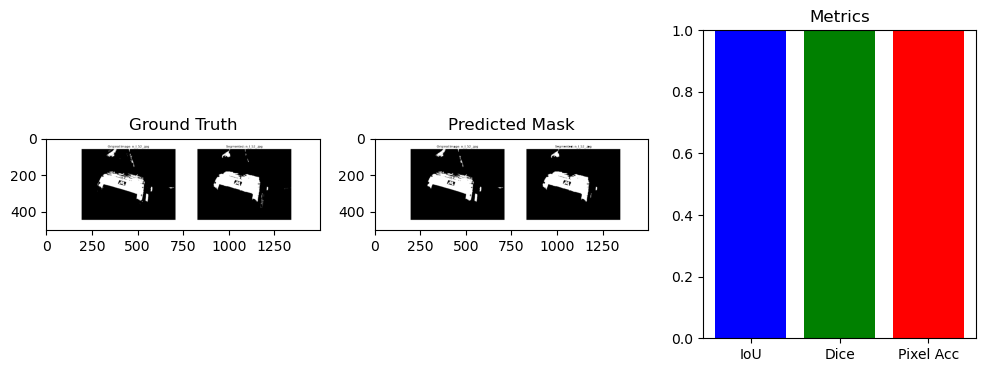

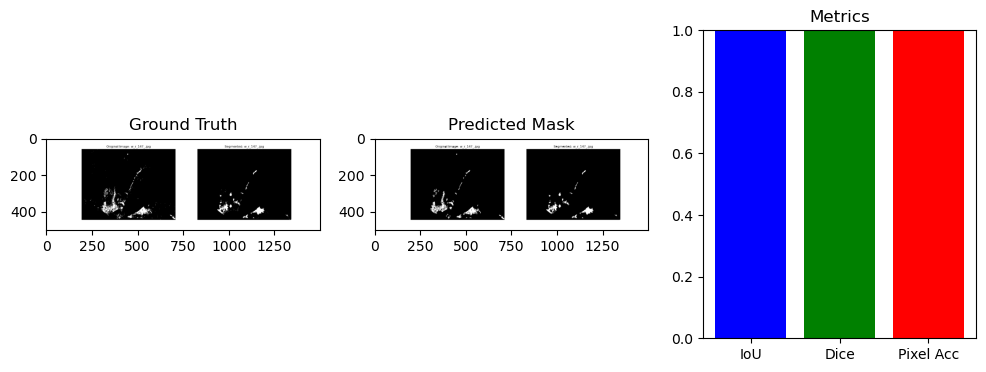

Skipping WR: File missing or unreadable.


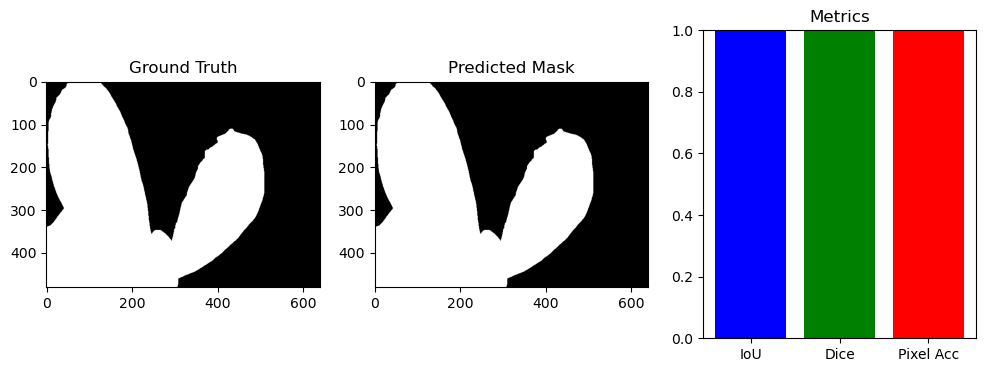

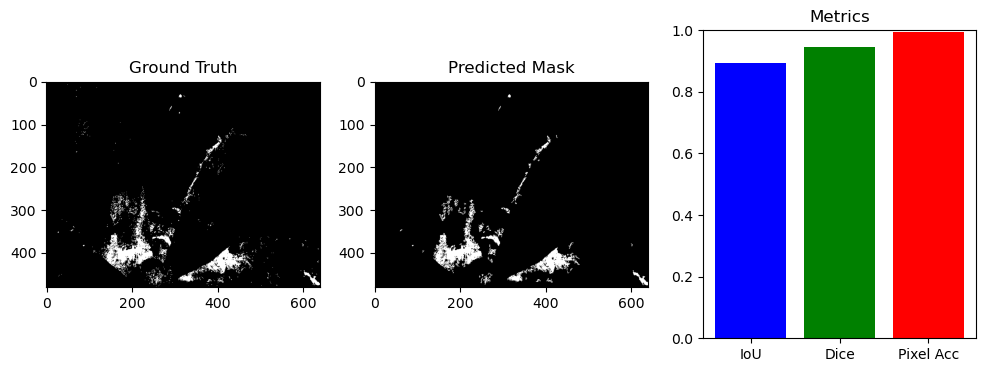

In [27]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to compute IoU (Intersection over Union)
def compute_iou(pred_mask, gt_mask):
    intersection = np.logical_and(pred_mask, gt_mask).sum()
    union = np.logical_or(pred_mask, gt_mask).sum()
    return intersection / union if union != 0 else 0

# Function to compute Dice Coefficient
def compute_dice(pred_mask, gt_mask):
    intersection = np.logical_and(pred_mask, gt_mask).sum()
    return (2 * intersection) / (pred_mask.sum() + gt_mask.sum()) if (pred_mask.sum() + gt_mask.sum()) != 0 else 0

# Function to compute Pixel Accuracy
def compute_pixel_accuracy(pred_mask, gt_mask):
    correct_pixels = (pred_mask == gt_mask).sum()
    total_pixels = gt_mask.size
    return correct_pixels / total_pixels

# Folder paths
ground_truth_folder = "C:/Users/USER/Desktop/test/masks/"
predicted_folder = "C:/Users/USER/Desktop/test/masks_cleaned/"

# Store results
results = []

for filename in os.listdir(ground_truth_folder):
    gt_path = os.path.join(ground_truth_folder, filename)
    pred_path = os.path.join(predicted_folder, f"cleaned_{filename}")

    # Read masks
    gt_mask = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)
    pred_mask = cv2.imread(pred_path, cv2.IMREAD_GRAYSCALE)

    # Skip if image is not found
    if gt_mask is None or pred_mask is None:
        print(f"Skipping {filename}: File missing or unreadable.")
        continue

    # Ensure masks are binary (0 or 255)
    gt_mask = cv2.threshold(gt_mask, 127, 255, cv2.THRESH_BINARY)[1] // 255
    pred_mask = cv2.threshold(pred_mask, 127, 255, cv2.THRESH_BINARY)[1] // 255

    # Compute metrics
    iou = compute_iou(pred_mask, gt_mask)
    dice = compute_dice(pred_mask, gt_mask)
    pixel_acc = compute_pixel_accuracy(pred_mask, gt_mask)

    results.append((filename, iou, dice, pixel_acc))

    # Display sample images
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(gt_mask, cmap='gray')
    ax[0].set_title("Ground Truth")

    ax[1].imshow(pred_mask, cmap='gray')
    ax[1].set_title("Predicted Mask")

    ax[2].bar(["IoU", "Dice", "Pixel Acc"], [iou, dice, pixel_acc], color=["blue", "green", "red"])
    ax[2].set_ylim(0, 1)
    ax[2].set_title("Metrics")

    plt.show()



Skipping FV: File missing or unreadable.
Skipping HD: File missing or unreadable.
Skipping RI: File missing or unreadable.
Skipping RO: File missing or unreadable.
Skipping WR: File missing or unreadable.

Overall Segmentation Performance:
--------------------------------------------------
| Avg IoU Score     : 0.9074
| Avg Dice Coeff.   : 0.9302
| Avg Pixel Accuracy: 0.9948
--------------------------------------------------


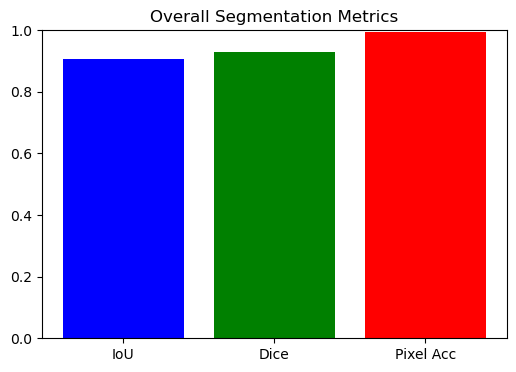

In [25]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to compute IoU (Intersection over Union)
def compute_iou(pred_mask, gt_mask):
    intersection = np.logical_and(pred_mask, gt_mask).sum()
    union = np.logical_or(pred_mask, gt_mask).sum()
    return intersection / union if union != 0 else 0

# Function to compute Dice Coefficient
def compute_dice(pred_mask, gt_mask):
    intersection = np.logical_and(pred_mask, gt_mask).sum()
    return (2 * intersection) / (pred_mask.sum() + gt_mask.sum()) if (pred_mask.sum() + gt_mask.sum()) != 0 else 0

# Function to compute Pixel Accuracy
def compute_pixel_accuracy(pred_mask, gt_mask):
    correct_pixels = (pred_mask == gt_mask).sum()
    total_pixels = gt_mask.size
    return correct_pixels / total_pixels

# Folder paths
ground_truth_folder = "C:/Users/USER/Desktop/test/masks/"
predicted_folder = "C:/Users/USER/Desktop/test/masks_cleaned/"

# Store results
iou_scores = []
dice_scores = []
pixel_acc_scores = []

for filename in os.listdir(ground_truth_folder):
    gt_path = os.path.join(ground_truth_folder, filename)
    pred_path = os.path.join(predicted_folder, f"cleaned_{filename}")

    # Read masks
    gt_mask = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)
    pred_mask = cv2.imread(pred_path, cv2.IMREAD_GRAYSCALE)

    # Skip if image is not found
    if gt_mask is None or pred_mask is None:
        print(f"Skipping {filename}: File missing or unreadable.")
        continue

    # Ensure masks are binary (0 or 255)
    gt_mask = cv2.threshold(gt_mask, 127, 255, cv2.THRESH_BINARY)[1] // 255
    pred_mask = cv2.threshold(pred_mask, 127, 255, cv2.THRESH_BINARY)[1] // 255

    # Compute metrics
    iou_scores.append(compute_iou(pred_mask, gt_mask))
    dice_scores.append(compute_dice(pred_mask, gt_mask))
    pixel_acc_scores.append(compute_pixel_accuracy(pred_mask, gt_mask))

# Compute overall average scores
avg_iou = np.mean(iou_scores) if iou_scores else 0
avg_dice = np.mean(dice_scores) if dice_scores else 0
avg_pixel_acc = np.mean(pixel_acc_scores) if pixel_acc_scores else 0

# Print final summary
print("\nOverall Segmentation Performance:")
print("--------------------------------------------------")
print(f"| Avg IoU Score     : {avg_iou:.4f}")
print(f"| Avg Dice Coeff.   : {avg_dice:.4f}")
print(f"| Avg Pixel Accuracy: {avg_pixel_acc:.4f}")
print("--------------------------------------------------")

# Display overall metrics as a bar chart
plt.figure(figsize=(6, 4))
plt.bar(["IoU", "Dice", "Pixel Acc"], [avg_iou, avg_dice, avg_pixel_acc], color=["blue", "green", "red"])
plt.ylim(0, 1)
plt.title("Overall Segmentation Metrics")
plt.show()


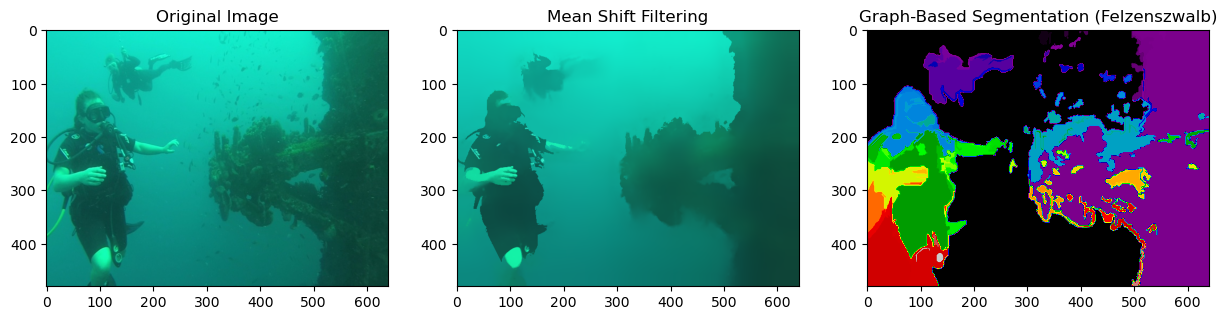

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import felzenszwalb

# Load the image
image = cv2.imread("C:/Users/USER/Desktop/test/images/n_l_12_.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 1: Apply Mean Shift Filtering (for color segmentation)
mean_shifted = cv2.pyrMeanShiftFiltering(image, sp=20, sr=40)

# Step 2: Convert to Grayscale and Compute Gradients
gray = cv2.cvtColor(mean_shifted, cv2.COLOR_RGB2GRAY)
gradient = cv2.Laplacian(gray, cv2.CV_64F)
gradient = np.uint8(np.absolute(gradient))  # Convert back to 8-bit format

# Step 3: Apply Graph-Based Segmentation (Felzenszwalb Algorithm)
segments = felzenszwalb(image, scale=150, sigma=0.8, min_size=100)

# Display Results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[1].imshow(mean_shifted)
axes[1].set_title("Mean Shift Filtering")
axes[2].imshow(segments, cmap='nipy_spectral')
axes[2].set_title("Graph-Based Segmentation (Felzenszwalb)")
plt.show()
